# Some examples of lattices
It is quite interesting to have a look in the optics of some of the CERN machines.

In [1]:
from cpymad.madx import Madx
import numpy as np
import requests
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
%config InlineBackend.figure_format = 'retina' # retina display


import matplotlib.patches as patches

def plotLatticeSeries(ax,series, height=1., v_offset=0., color='r',alpha=0.5):
    aux=series
    ax.add_patch(
    patches.Rectangle(
        (aux.s-aux.l, v_offset-height/2.),   # (x,y)
        aux.l,          # width
        height,          # height
        color=color, alpha=alpha
    )
    )
    return;

## The Proton Synchrotron Booster

In [2]:
# import elements, sequence and strengths
madx = Madx()
response = requests.get('http://project-ps-optics.web.cern.ch/project-PS-optics/cps/Psb/2015/psb.ele')
data = response.text
madx.input(data);

response = requests.get('http://project-ps-optics.web.cern.ch/project-PS-optics/cps/Psb/2015/psb.seq')
data = response.text
madx.input(data);

response = requests.get('http://project-ps-optics.web.cern.ch/project-PS-optics/cps/Psb/2015/strength/psb_extraction.str')
data = response.text
madx.input(data);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.05.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2019.05.10               +
  + Execution date: 2019.06.10 20:15:58      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [3]:
madx.input(
'''
TITLE, "Injection optics PSB ";


beam, particle=PROTON, pc=0.311, exn=15E-6*3.0,eyn=8E-6*3.0, sige=1.35E-3*3.0, sigt=230E-9 ;  ! 3 sigma ISOLDE type beam.
use, sequence=psb1;


twiss;
''');

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
            157.08                 -0      0.06093374091        4.051082421 

                q1                dq1            betxmax              dxmax 
       4.172000003        -10.6630441        7.602127751        5.392392207 

             dxrms             xcomax             xcorms                 q2 
       4.861940313                  0                  0        4.230000256 

               dq2            betymax              dymax              dyrms 
      -21.36790773        14.16672117                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

            nflips 
          

In [4]:
myTwiss=madx.table.twiss.dframe()

In [5]:
DF=myTwiss[(myTwiss['keyword']=='rbend')]

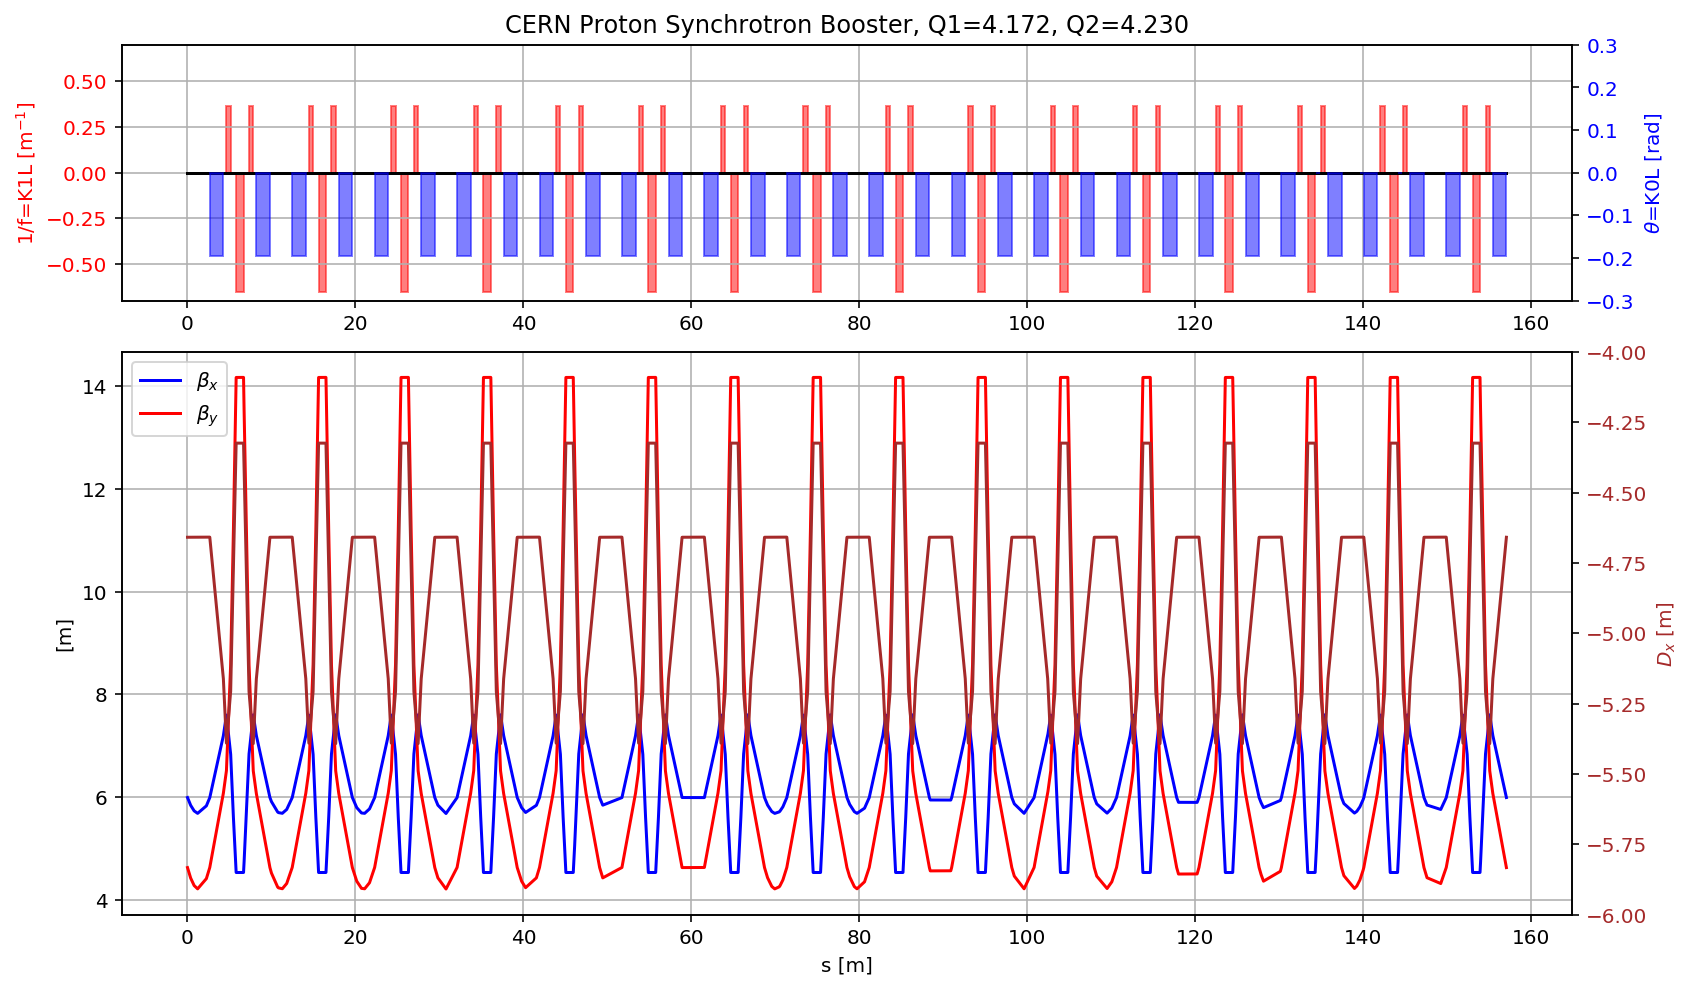

In [6]:
# plotting the results
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')


DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
    
DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
plt.ylim(-.065,0.065)
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.ylim(-.7,.7)
plt.title('CERN Proton Synchrotron Booster, Q1='+format(madx.table.summ.Q1[0],'2.3f')+', Q2='+ format(madx.table.summ.Q2[0],'2.3f'))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


#DF=myTwiss[(myTwiss['keyword']=='sbend')]
#for i in range(len(DF)):
#    aux=DF.iloc[i]
#    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle*1000/2, color='b')

DF=myTwiss[(myTwiss['keyword']=='rbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.angle, v_offset=aux.angle/2, color='b')

plt.ylim(-.3,.3)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('[m]')
plt.xlabel('s [m]')
plt.grid()

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$')
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-6, -4)
plt.savefig('/cas/images/PSBOpticsRing.pdf')

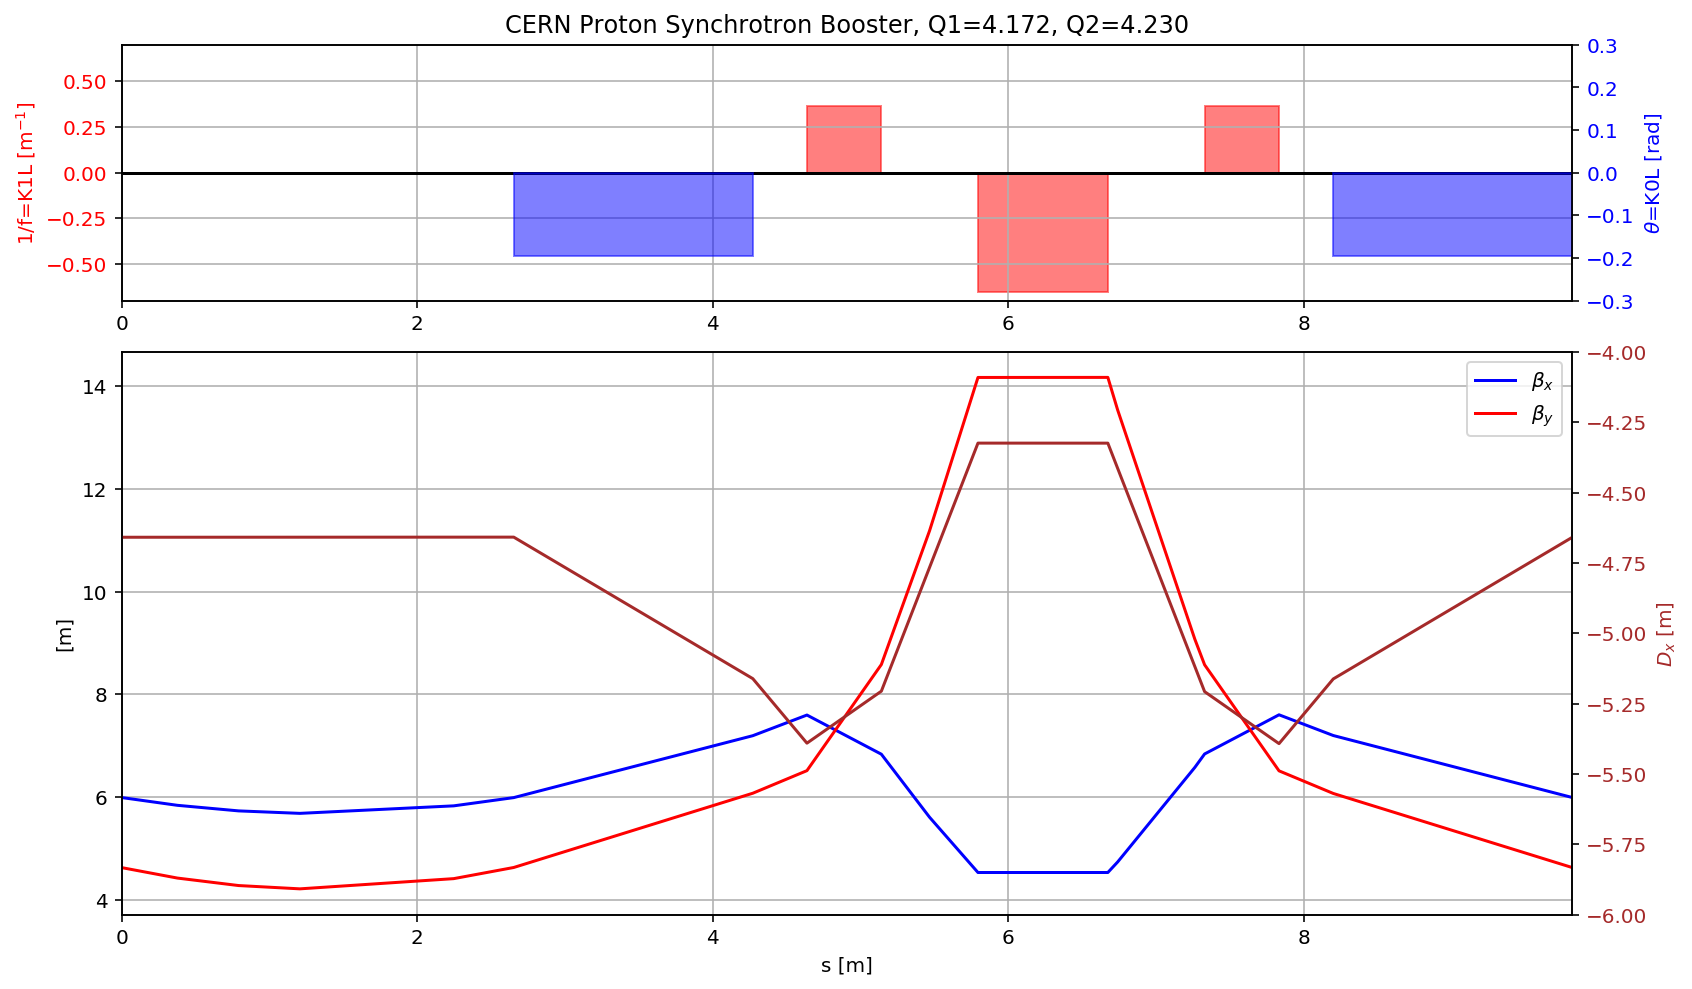

In [7]:
fig.gca().set_xlim(myTwiss[(myTwiss['name']).str.contains('p01bot\$start:1')].s.values[0],myTwiss[(myTwiss['name']).str.contains('p01bot\$end:1')].s.values[0])
display(fig)
fig.savefig('/cas/images/PSBOpticsCell.pdf')

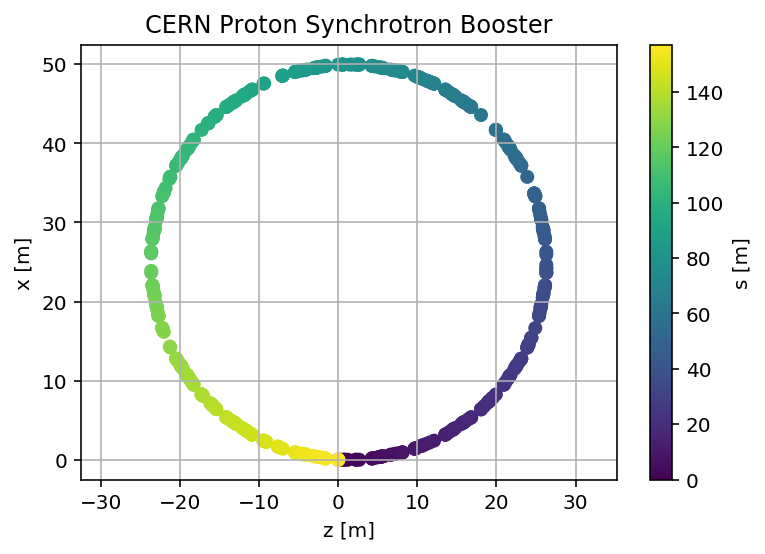

In [8]:
madx.input('survey;')
mySurvey=madx.table.survey.dframe()
plt.scatter(mySurvey['z'],mySurvey['x'],c=mySurvey['s'])
plt.axis('equal')
plt.xlabel('z [m]')
plt.ylabel('x [m]')
plt.grid()
cbar = plt.colorbar()
cbar.set_label('s [m]')
plt.title('CERN Proton Synchrotron Booster')
plt.savefig('/cas/images/PSBSurvey.pdf')

## The Proton Synchrotron 

In [9]:
# import elements, sequence and strengths
madx = Madx()
response = requests.get('http://project-ps-optics.web.cern.ch/project-PS-optics/cps/Psring/models/2015/elements/PS.ele')
data = response.text
madx.input(data);

response = requests.get('http://project-ps-optics.web.cern.ch/project-PS-optics/cps/Psring/models/2015/sequence/PS.seq')
data = response.text
madx.input(data);

response = requests.get('http://project-ps-optics.web.cern.ch/project-PS-optics/cps/Psring/models/2015/strength/PS_Injection9_for_OP_group.str')
data = response.text
madx.input(data);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.05.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2019.05.10               +
  + Execution date: 2019.06.10 20:16:18      +
  ++++++++++++++++++++++++++++++++++++++++++++
++++++ info: brho redefined


In [10]:
madx.input(
'''
TITLE, "Injection optics PS with Qx=6.131, Qy=6.288";


beam, particle=proton, pc=pc;
use, sequence=PS;

value, pc, beam->pc, beam->energy;

twiss;
''');

pc                 =           2.141766 ;
beam->pc           =           2.141766 ;
beam->energy       =        2.338272032 ;
enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
       628.3185307                 -0      0.02669023141        6.121020449 

                q1                dq1            betxmax              dxmax 
       6.249999995       -5.792883455        22.55476667        3.339025346 

             dxrms             xcomax             xcorms                 q2 
       2.937867823                  0                  0        6.289999995 

               dq2            betymax              dymax              dyrms 
      -7.669762625        22.44563378                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4   

In [11]:
myTwiss=madx.table.twiss.dframe()

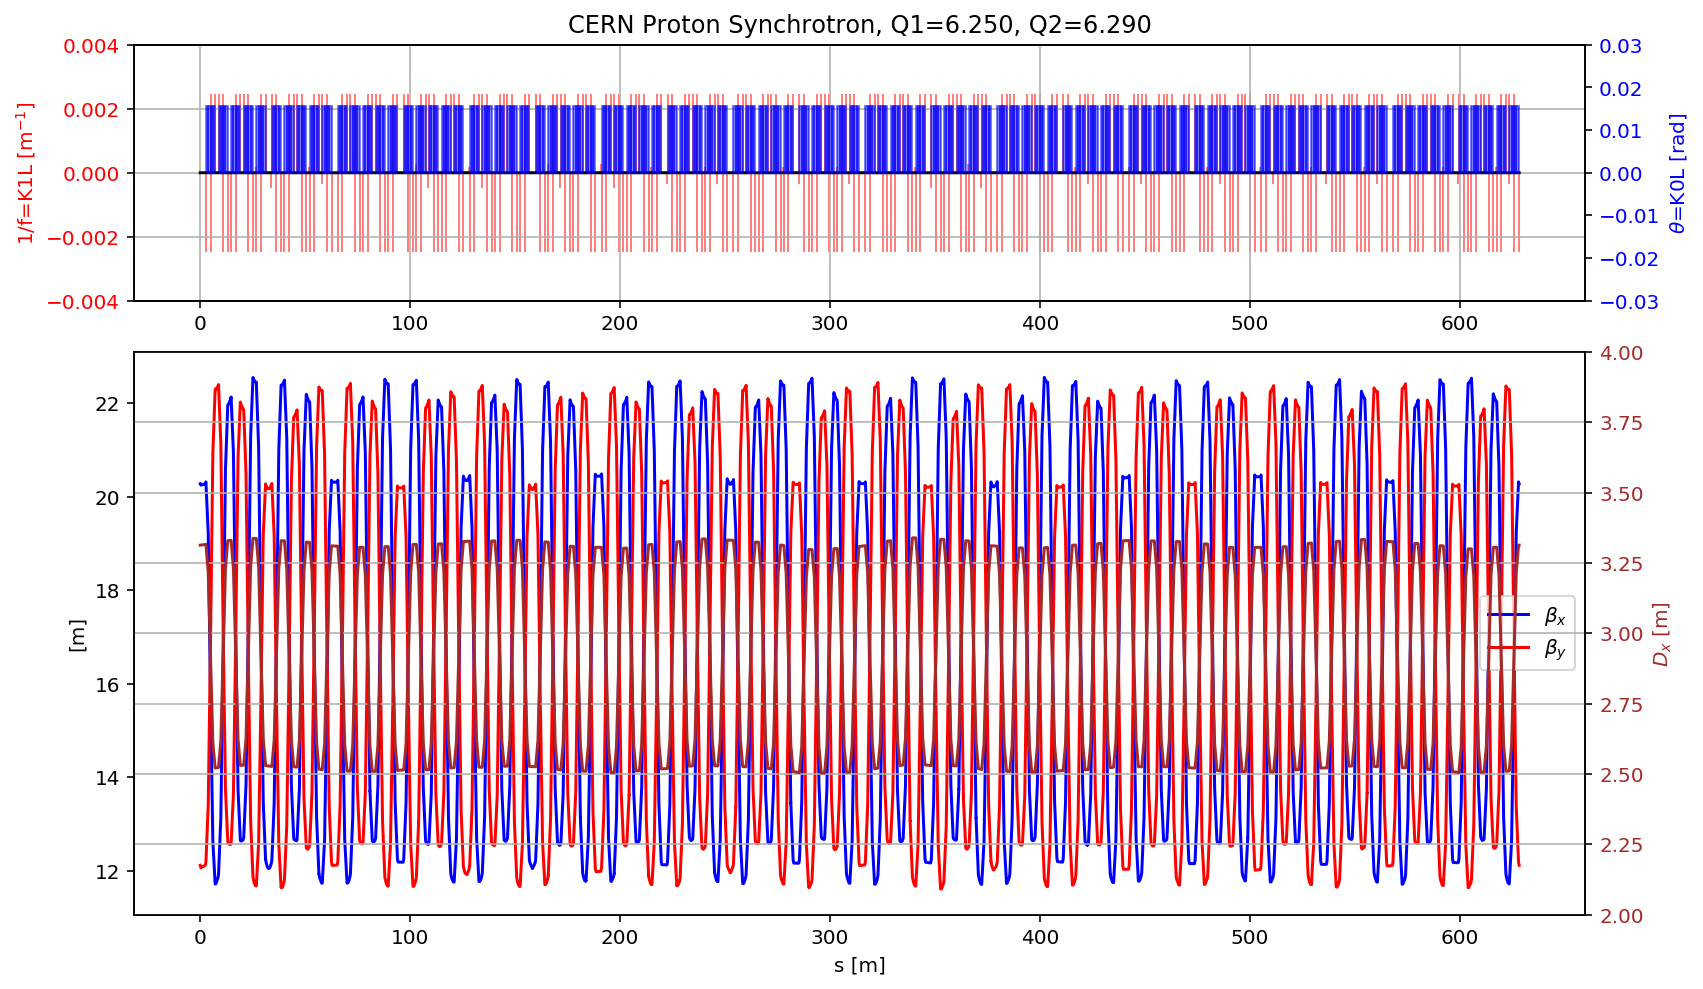

In [12]:
# plotting the results
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')



    
DF=myTwiss[(myTwiss['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
plt.ylim(-.065,0.065)
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.ylim(-.004,.004)
plt.title('CERN Proton Synchrotron, Q1='+format(madx.table.summ.Q1[0],'2.3f')+', Q2='+ format(madx.table.summ.Q2[0],'2.3f'))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle, v_offset=aux.angle/2, color='b')

plt.ylim(-.03,.03)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('[m]')
plt.xlabel('s [m]')

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$')
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(2, 4)

plt.grid()
fig.savefig('/cas/images/PSOpticsRing.pdf')

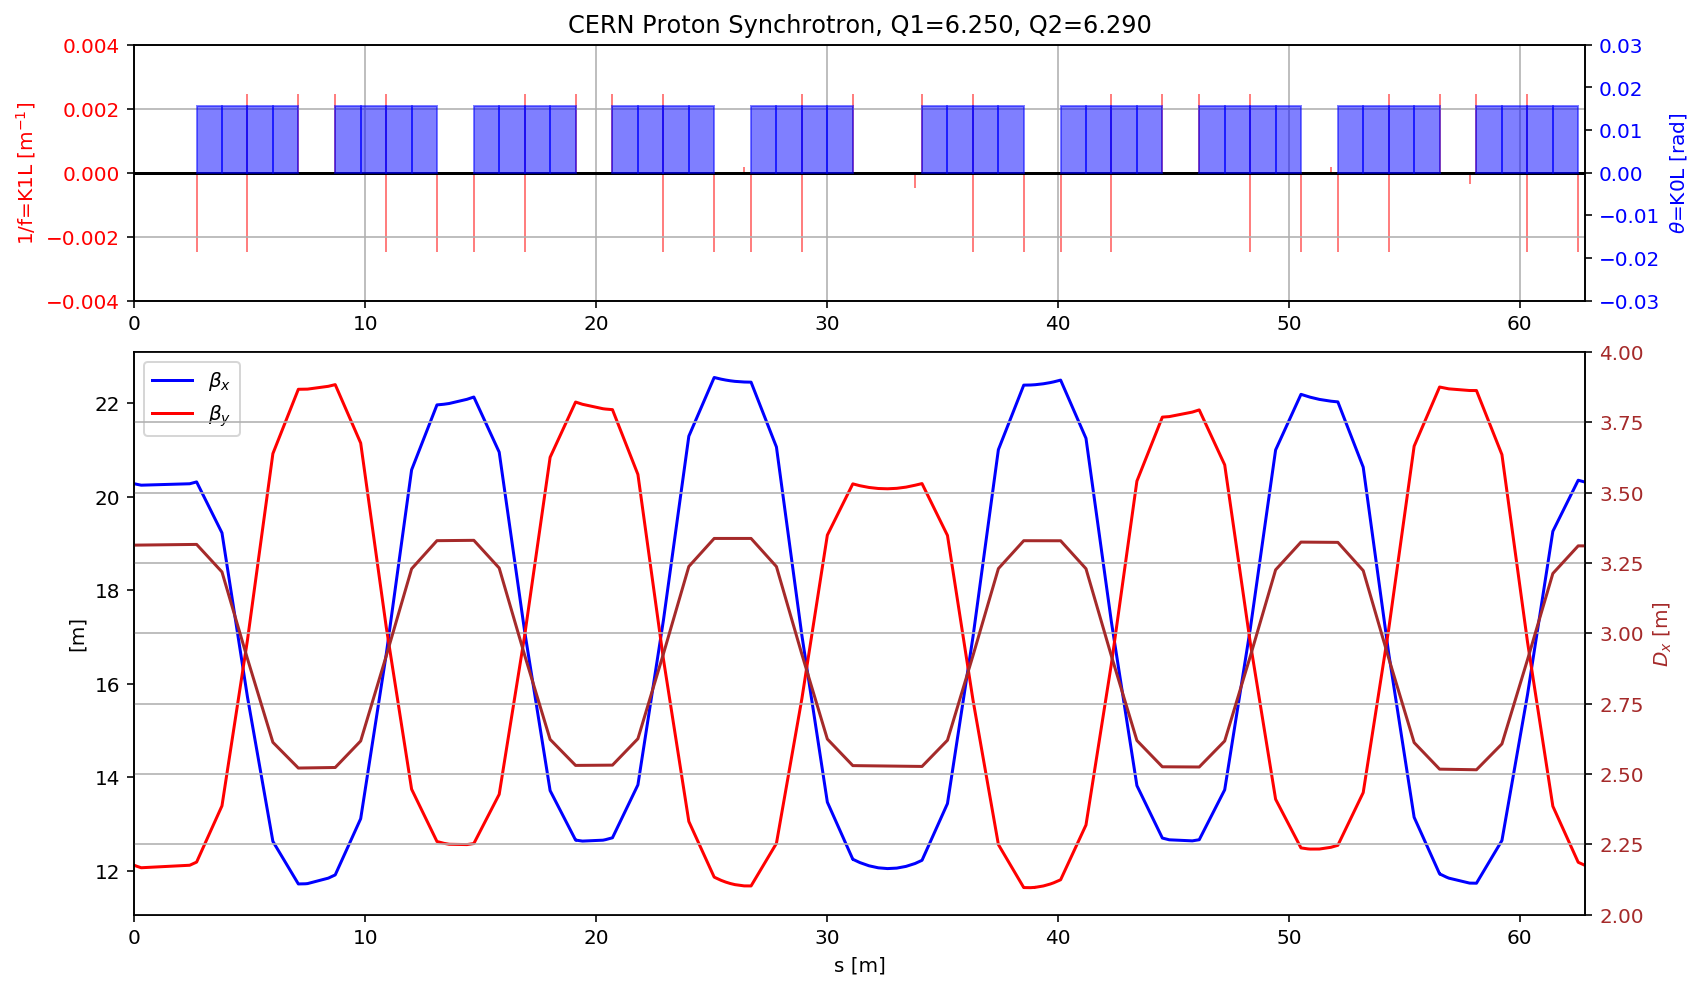

In [13]:
fig.gca().set_xlim(myTwiss[(myTwiss['name']).str.contains('sec1\$start:1')].s.values[0],myTwiss[(myTwiss['name']).str.contains('sec1\$end:1')].s.values[0])
display(fig)
fig.savefig('/cas/images/PSOpticsCell.pdf')

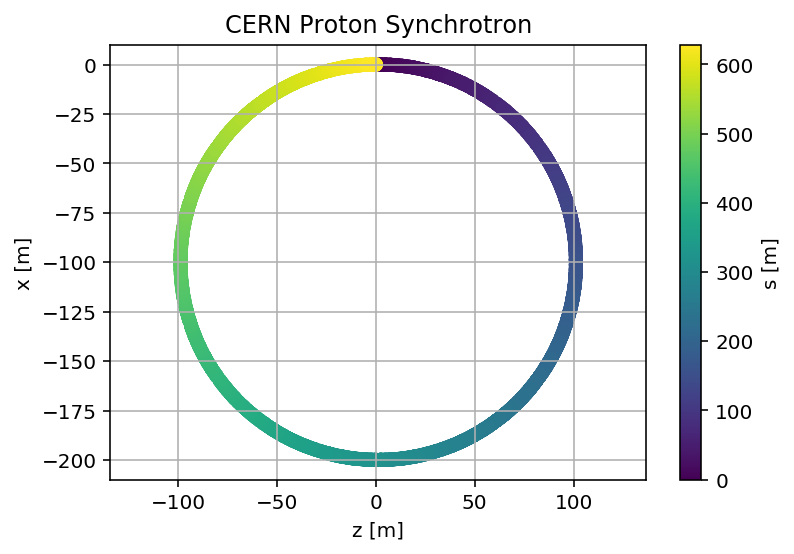

In [14]:
madx.input('survey;')
mySurvey=madx.table.survey.dframe()
plt.scatter(mySurvey['z'],mySurvey['x'],c=mySurvey['s'])
plt.axis('equal')
plt.xlabel('z [m]')
plt.ylabel('x [m]')
plt.grid()
cbar = plt.colorbar()
cbar.set_label('s [m]')
plt.title('CERN Proton Synchrotron');
plt.savefig('/cas/images/PSSurvey.pdf')

## The Super Proton Synchrotron

In [15]:
# import elements, sequence and strengths
madx = Madx()
response = requests.get('http://project-sps-optics.web.cern.ch/project-SPS-optics/2015/elements/sps.ele')
data = response.text
madx.input(data);

response = requests.get('http://project-sps-optics.web.cern.ch/project-SPS-optics/2015/sequence/sps.seq')
data = response.text
madx.input(data);

response = requests.get('http://project-sps-optics.web.cern.ch/project-SPS-optics/2015/strength/lhc_newwp.str')
data = response.text
madx.input(data);

    
response = requests.get('http://project-sps-optics.web.cern.ch/project-SPS-optics/2015/strength/elements.str')
data = response.text
madx.input(data);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.05.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2019.05.10               +
  + Execution date: 2019.06.10 20:16:39      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [16]:
madx.input(
'''
TITLE, "Injection optics SPS with Qx=26.13, Qy=26.18";


Z:=1;
A:=1;
TBUNCH:=1.0e-9;

Beam, particle = proton, pc = 26.0,exn=3.0E-6*4.0,eyn=3.0E-6*4.0, sige=1.07e-3, sigt=TBUNCH*CLIGHT*(BEAM->PC/BEAM->ENERGY), NPART=1.3E11, BUNCHED;
use, sequence=SPS;


twiss;
''');

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
         6911.5038                 -0     0.001928024863        22.77422909 

                q1                dq1            betxmax              dxmax 
       26.12999969    -0.001156581177        103.5088351        4.772404125 

             dxrms             xcomax             xcorms                 q2 
       2.301836594                  0                  0        26.17999991 

               dq2            betymax              dymax              dyrms 
   -0.002845588013        104.2740908                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

            nflips 
          

In [17]:
myTwiss=madx.table.twiss.dframe()

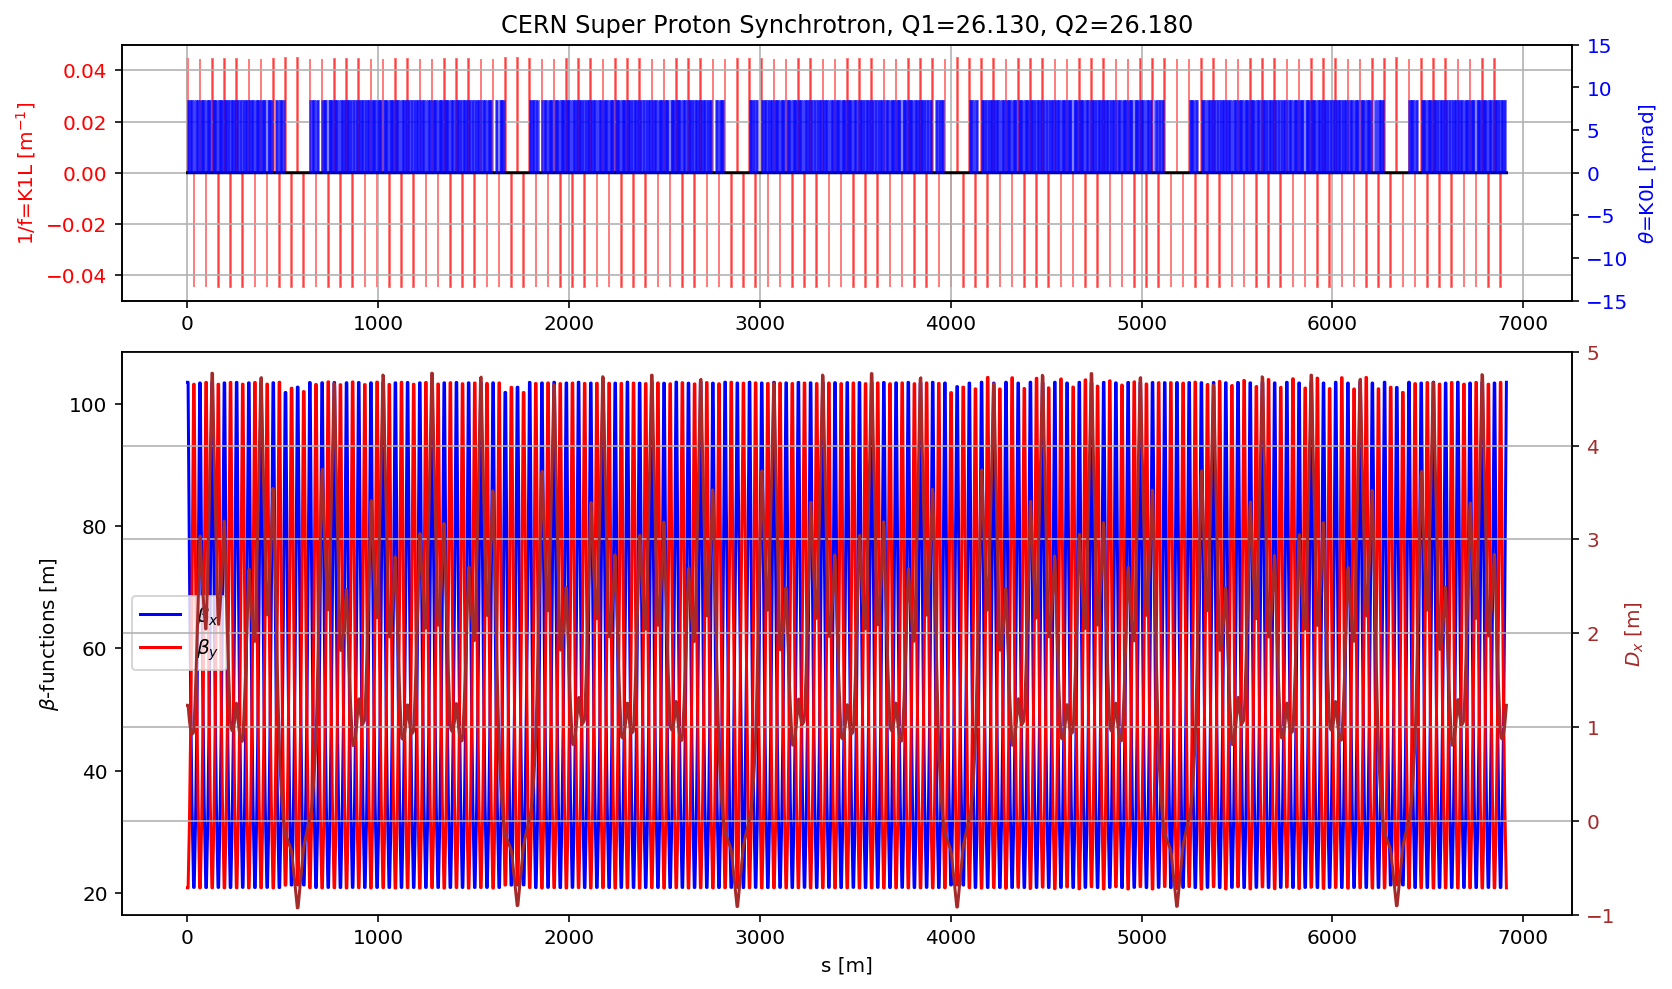

In [18]:
# plotting the results
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')



    
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.ylim(-.05,.05)
plt.title('CERN Super Proton Synchrotron, Q1='+format(madx.table.summ.Q1[0],'2.3f')+', Q2='+ format(madx.table.summ.Q2[0],'2.3f'))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


DF=myTwiss[(myTwiss['keyword']=='rbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1e3, v_offset=aux.angle/2*1e3, color='b')

plt.ylim(-15,15)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('$\\beta$-functions [m]')
plt.xlabel('s [m]')

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$')
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-1, 5)

plt.grid()
fig.savefig('/cas/images/SPSOpticsRing.pdf')

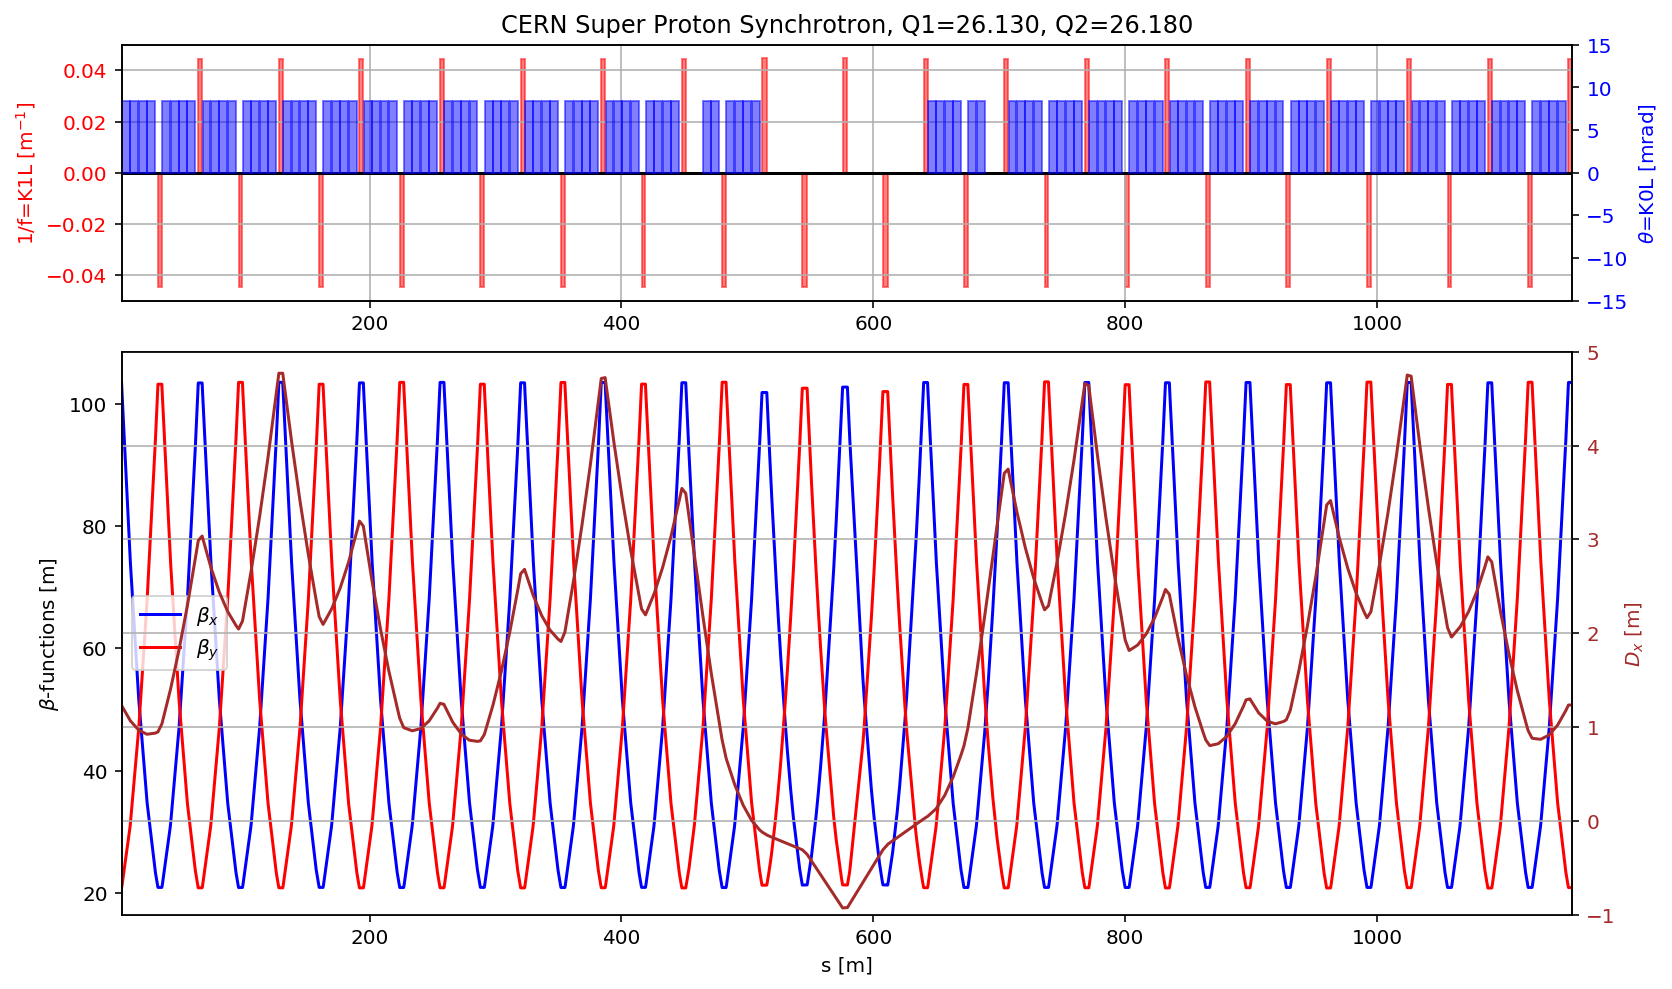

In [19]:
fig.gca().set_xlim(myTwiss[(myTwiss['name']).str.contains('qf.10010')].s.values[0],myTwiss[(myTwiss['name']).str.contains('qf.20010')].s.values[0])
display(fig)
fig.savefig('/cas/images/SPSOpticsZoom.pdf')

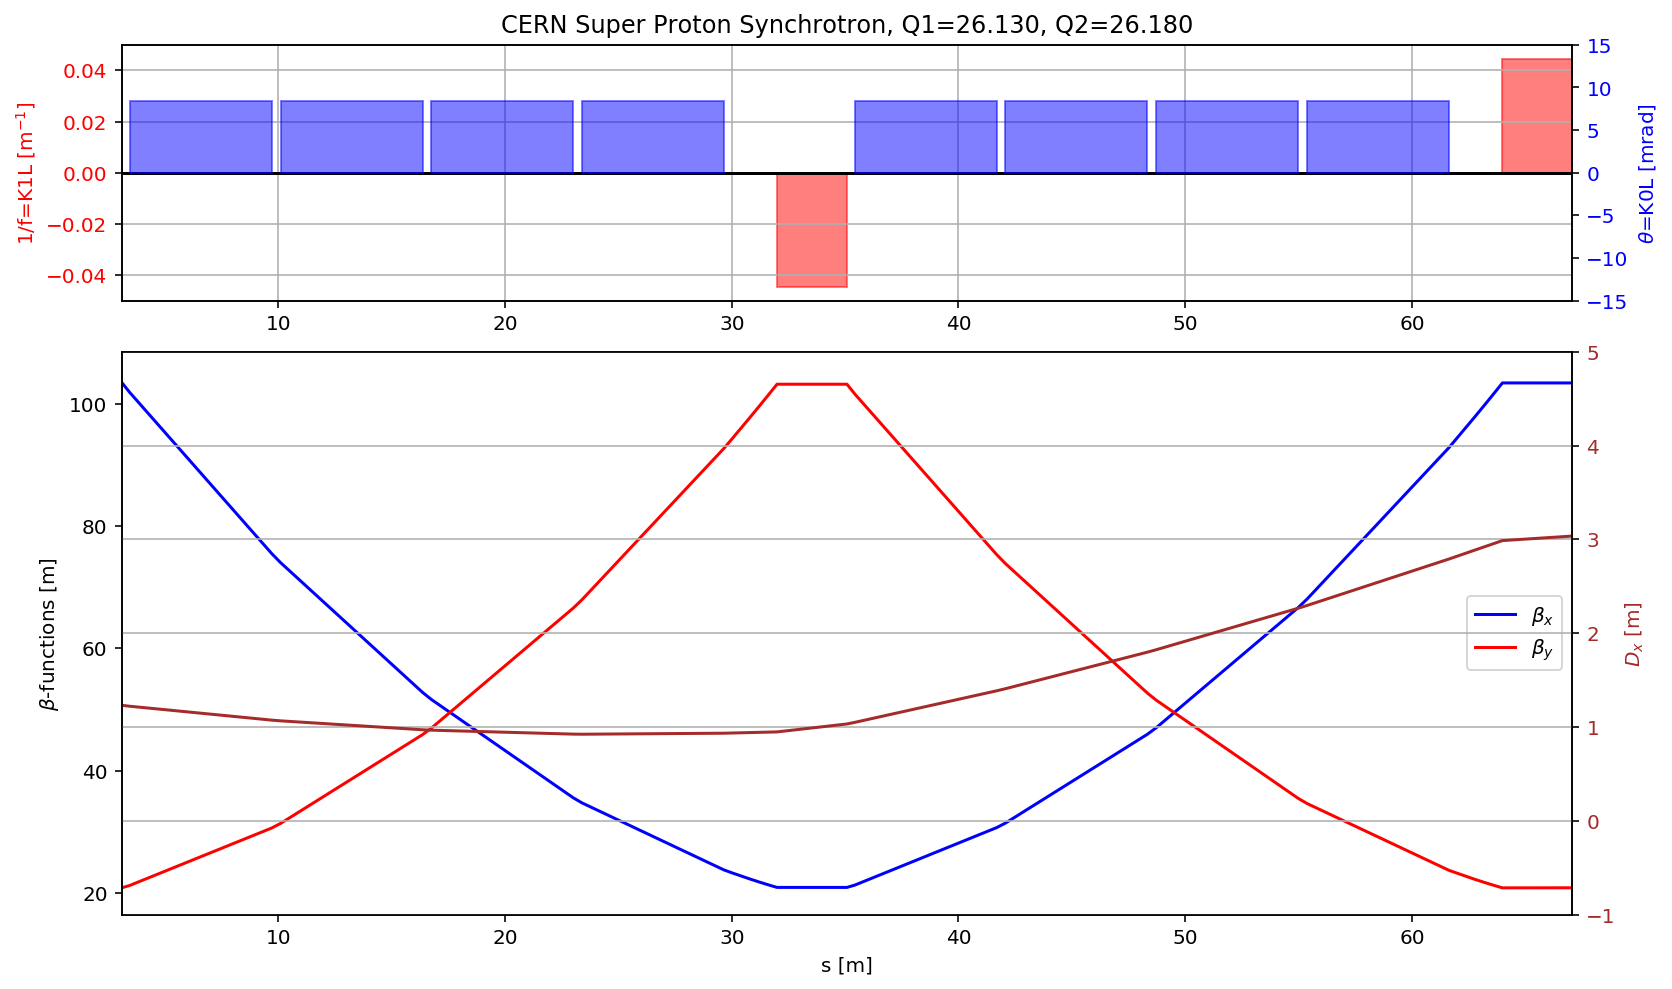

In [20]:
fig.gca().set_xlim(myTwiss[(myTwiss['name']).str.contains('qf.10010')].s.values[0],myTwiss[(myTwiss['name']).str.contains('qf.10210:1')].s.values[0])
display(fig)
fig.savefig('/cas/images/SPSOpticsCell.pdf')

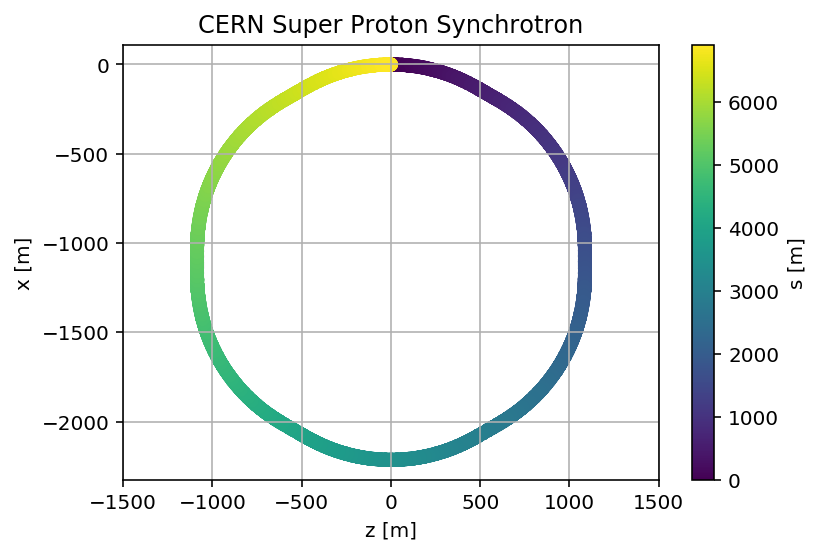

In [21]:
madx.input('survey;')
mySurvey=madx.table.survey.dframe()
plt.scatter(mySurvey['z'],mySurvey['x'],c=mySurvey['s'])
plt.axis('equal')
plt.xlabel('z [m]')
plt.ylabel('x [m]')
plt.grid()
cbar = plt.colorbar()
cbar.set_label('s [m]')
plt.title('CERN Super Proton Synchrotron');
plt.savefig('/cas/images/SPSSurvey.pdf')


## The Large Hadron Collider

In [22]:
# import elements, sequence and strengths
madx = Madx(stdout=False)
response = requests.get('http://abpdata.web.cern.ch/abpdata/lhc_optics_web/www/opt2016/inj/lhc_opt2016_inj.seq')
data = response.text
madx.input(data);

    
response = requests.get('http://abpdata.web.cern.ch/abpdata/lhc_optics_web/www/opt2016/inj/db5/opt_inj.madx')
data = response.text
madx.input(data);

In [23]:
madx.input(
'''
beam, sequence=lhcb1, bv= 1,
  particle=proton, charge=1, mass=0.938272046,
  energy= 450,   npart=1.2e11,kbunch=2076,
  ex=5.2126224777777785e-09,ey=5.2126224777777785e-09;
beam, sequence=lhcb2, bv=-1,
  particle=proton, charge=1, mass=0.938272046,
  energy= 450,   npart=1.2e11,kbunch=2076,
  ex=5.2126224777777785e-09,ey=5.2126224777777785e-09;
''');

In [24]:
madx.input(
'''
seqedit, sequence=lhcb1;
flatten;
cycle, start=ip1;
flatten;
endedit;

use, sequence=lhcb1;
twiss;
''');

In [25]:
myTwissB1=madx.table.twiss.dframe()

In [26]:
madx.input(
'''
seqedit, sequence=lhcb2;
flatten;
cycle, start=ip1;
flatten;
endedit;

use, sequence=lhcb2;
twiss;
''');

In [27]:
myTwissB2=madx.table.twiss.dframe()

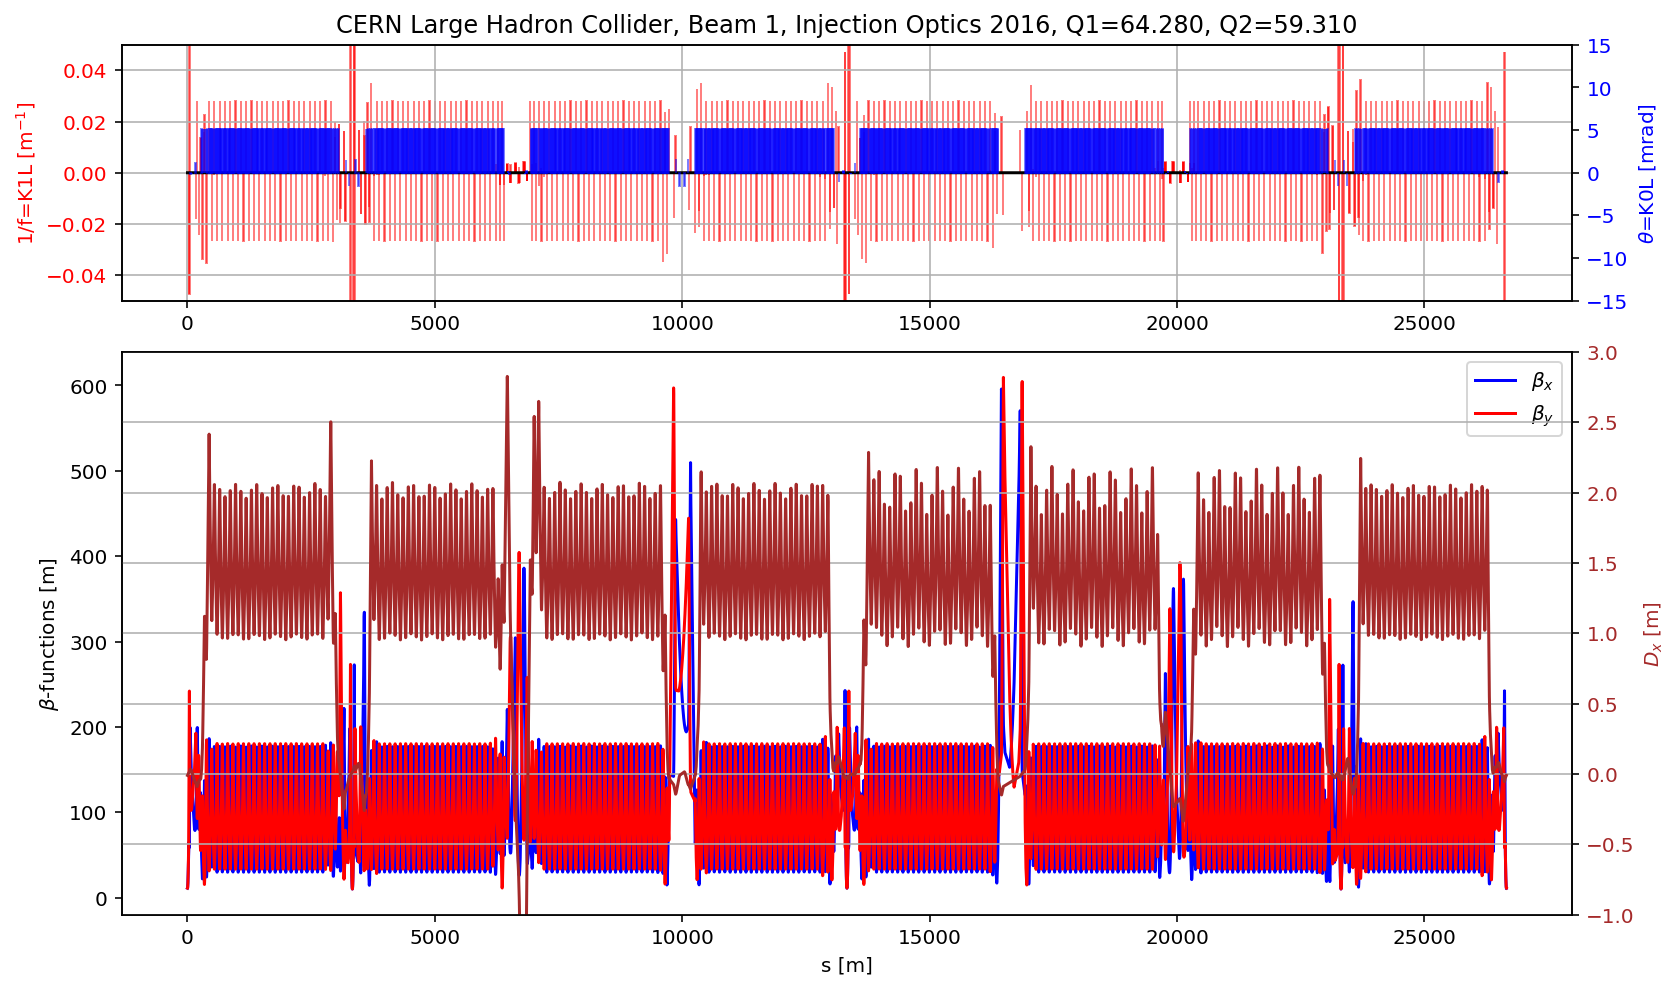

In [28]:
myTwiss=myTwissB1
# plotting the results
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')



    
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.ylim(-.05,.05)
plt.title('CERN Large Hadron Collider, Beam 1, Injection Optics 2016, Q1='+format(madx.table.summ.Q1[0],'2.3f')+', Q2='+ format(madx.table.summ.Q2[0],'2.3f'))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


DF=myTwiss[(myTwiss['keyword']=='rbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

    
plt.ylim(-15,15)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('$\\beta$-functions [m]')
plt.xlabel('s [m]')

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$')
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-1, 3)

plt.grid()
fig.savefig('/cas/images/LHCB1OpticsRing.pdf')

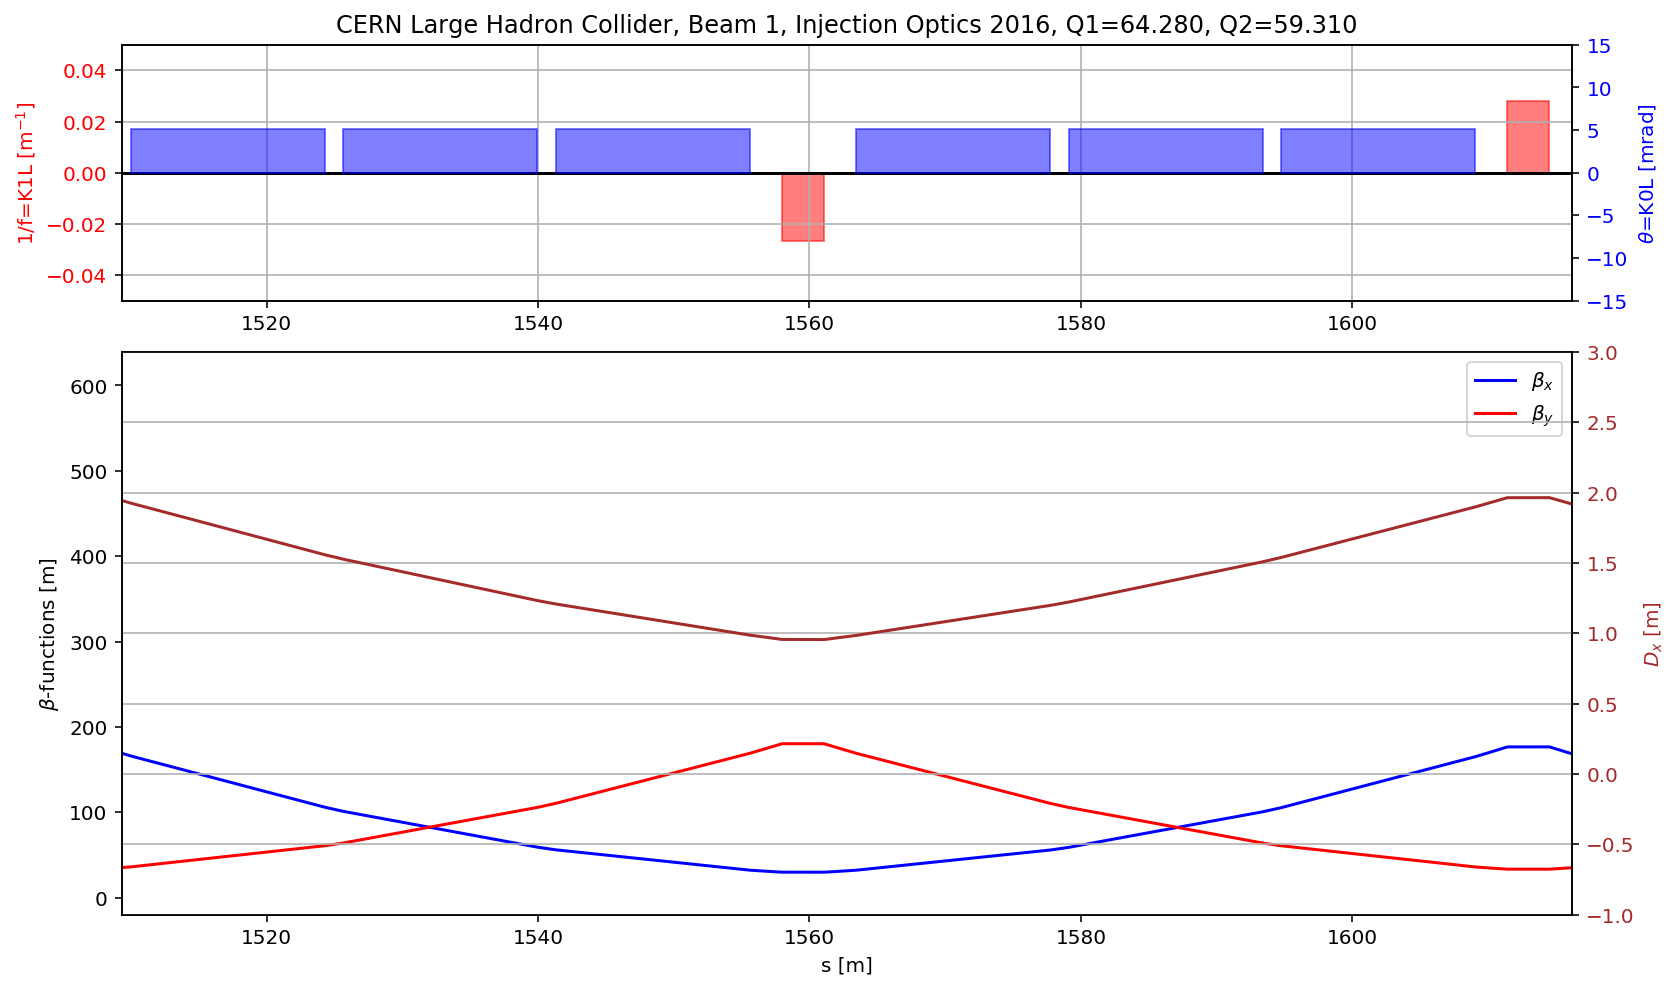

In [29]:
# the cell
aux=myTwiss[myTwiss['keyword']=='marker']
fig.gca().set_xlim(aux[(aux['name']).str.contains('s.cell.12.b1')].s.values[0],aux[(aux['name']).str.contains('e.cell.12.b1')].s.values[0])
display(fig)
fig.savefig('/cas/images/LHCB1OpticsCell.pdf')

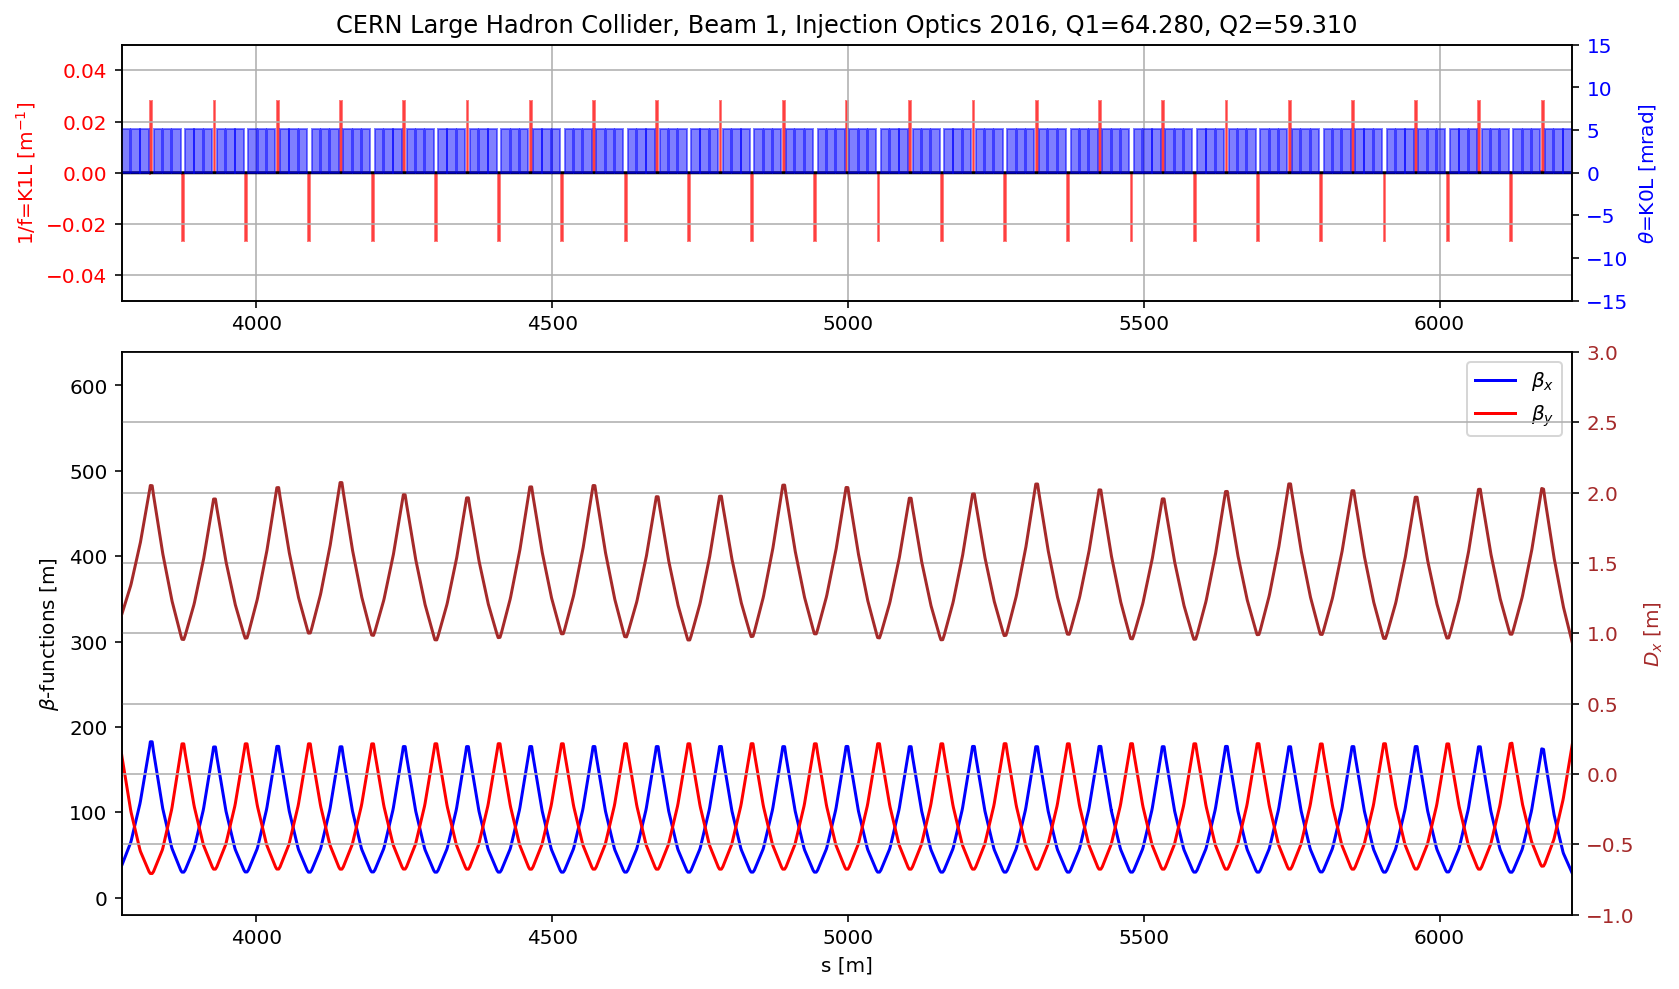

In [30]:
# the arc
aux=myTwiss[myTwiss['keyword']=='marker']
fig.gca().set_xlim(aux[(aux['name']).str.contains('s\.arc.23')].s.values[0],aux[(aux['name']).str.contains('e\.arc.23')].s.values[0])
display(fig)
fig.savefig('/cas/images/LHCB1OpticsArc.pdf')

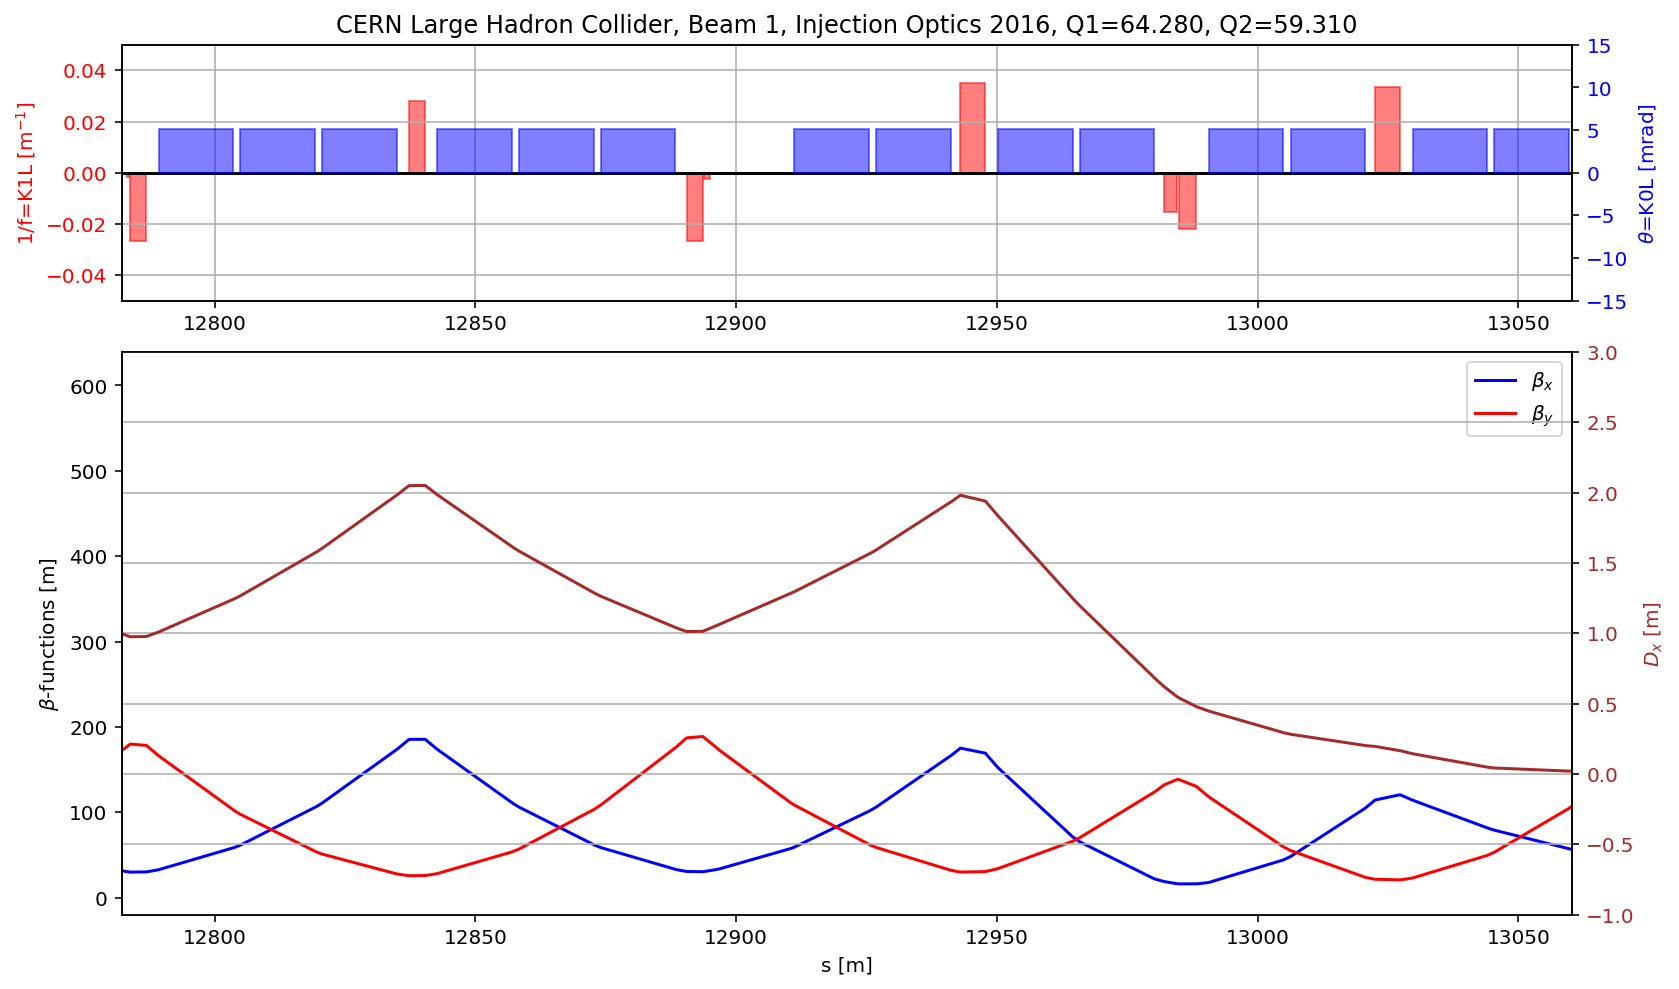

In [31]:
# the DS
aux=myTwiss[myTwiss['keyword']=='marker']
fig.gca().set_xlim(aux[(aux['name']).str.contains('s.ds.l5.b1:1')].s.values[0],aux[(aux['name']).str.contains('e.ds.l5.b1:1')].s.values[0])
display(fig)
fig.savefig('/cas/images/LHCB1OpticsDS.pdf')

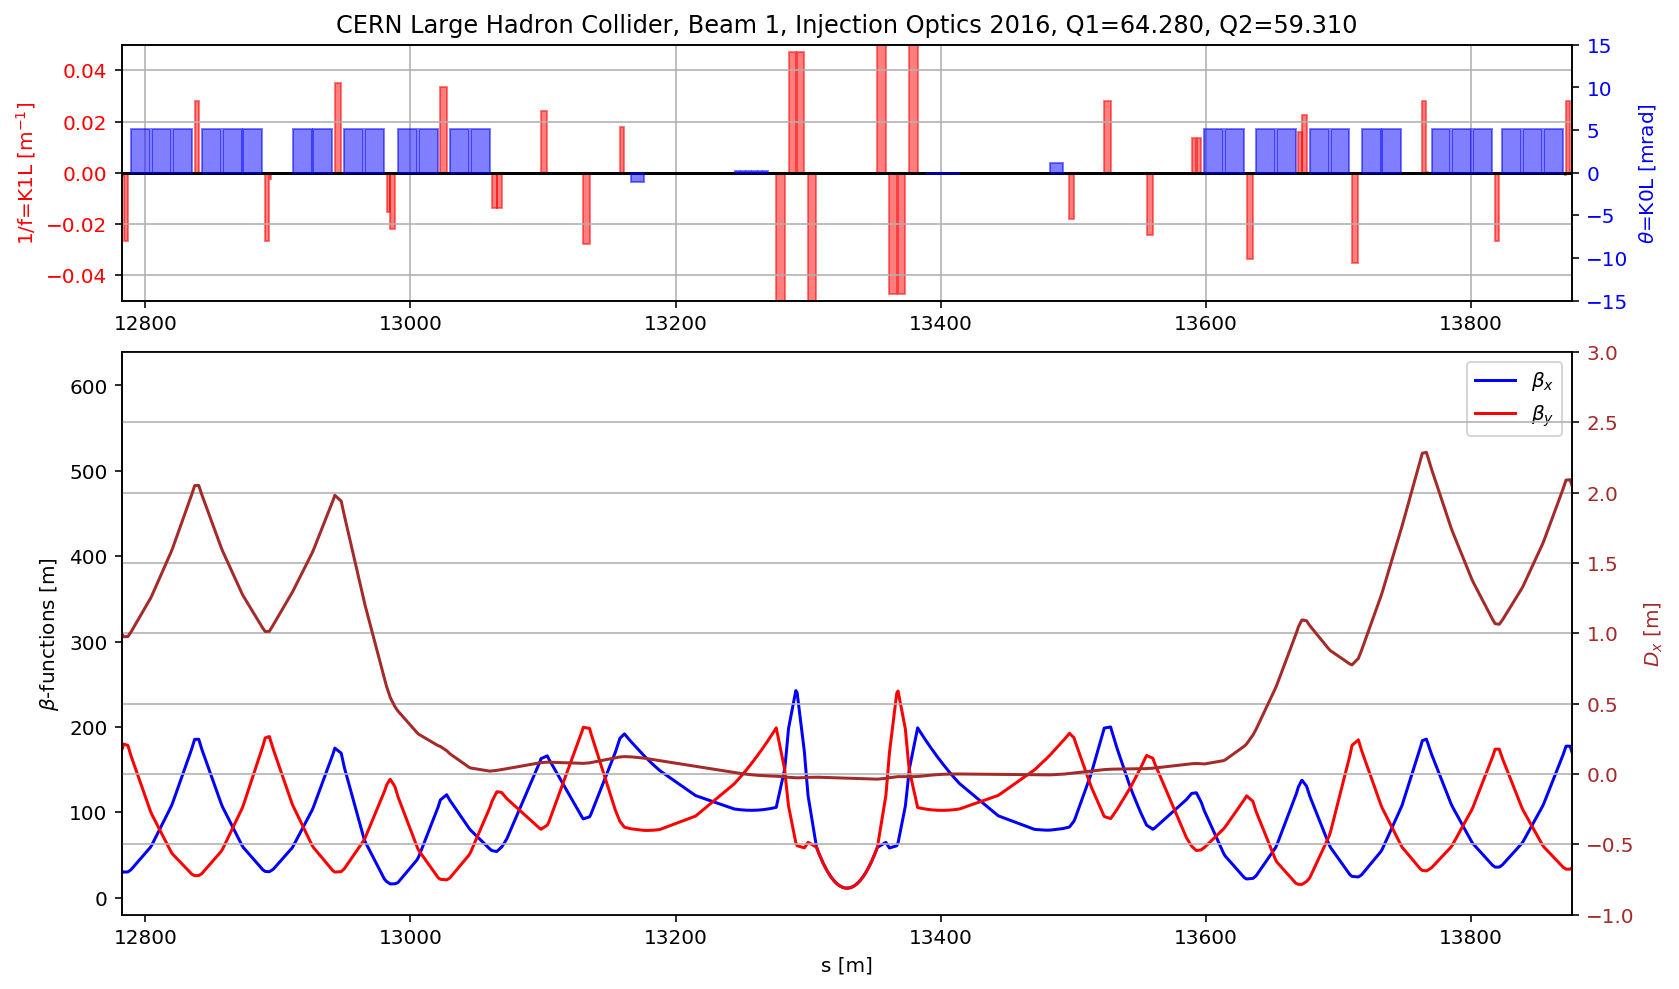

In [32]:
aux=myTwiss[myTwiss['keyword']=='marker']
fig.gca().set_xlim(aux[(aux['name']).str.contains('s.ds.l5.b1:1')].s.values[0],aux[(aux['name']).str.contains('e.ds.r5.b1:1')].s.values[0])
display(fig)
fig.savefig('/cas/images/LHCB1OpticsIR.pdf')

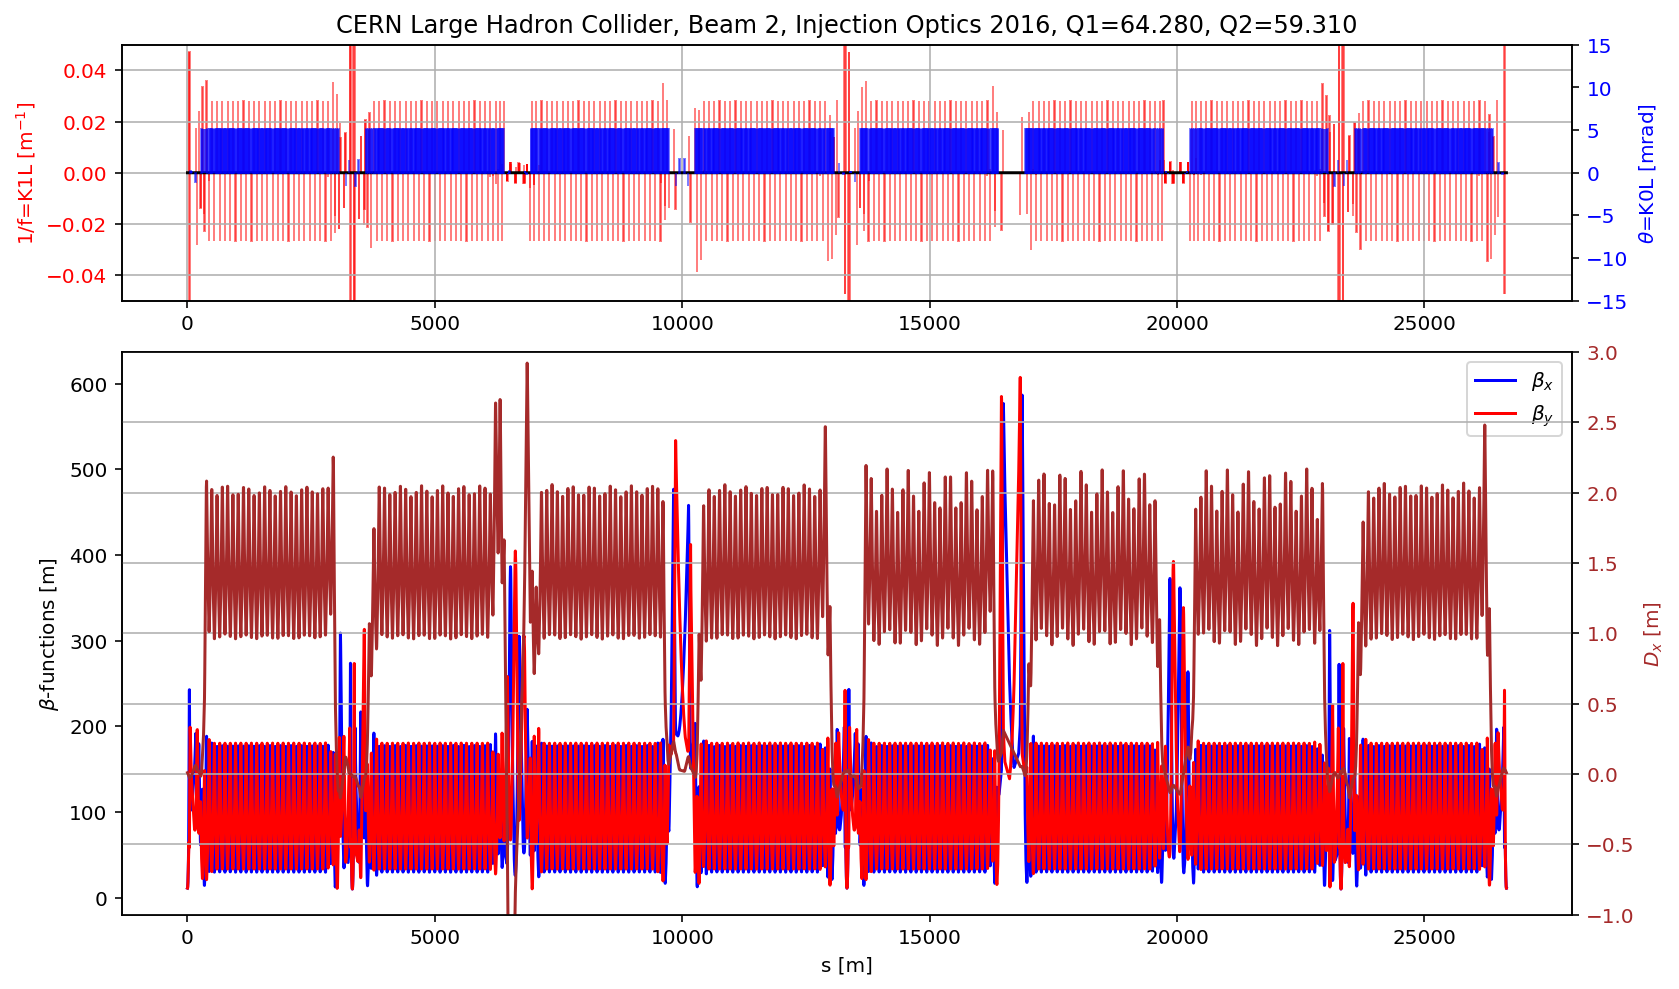

In [33]:
myTwiss=myTwissB2
# plotting the results
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')



    
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.ylim(-.05,.05)
plt.title('CERN Large Hadron Collider, Beam 2, Injection Optics 2016, Q1='+format(madx.table.summ.Q1[0],'2.3f')+', Q2='+ format(madx.table.summ.Q2[0],'2.3f'))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [mrad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


DF=myTwiss[(myTwiss['keyword']=='rbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle*1000, v_offset=aux.angle/2*1000, color='b')

    
plt.ylim(-15,15)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('$\\beta$-functions [m]')
plt.xlabel('s [m]')

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$')
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-1, 3)

plt.grid()

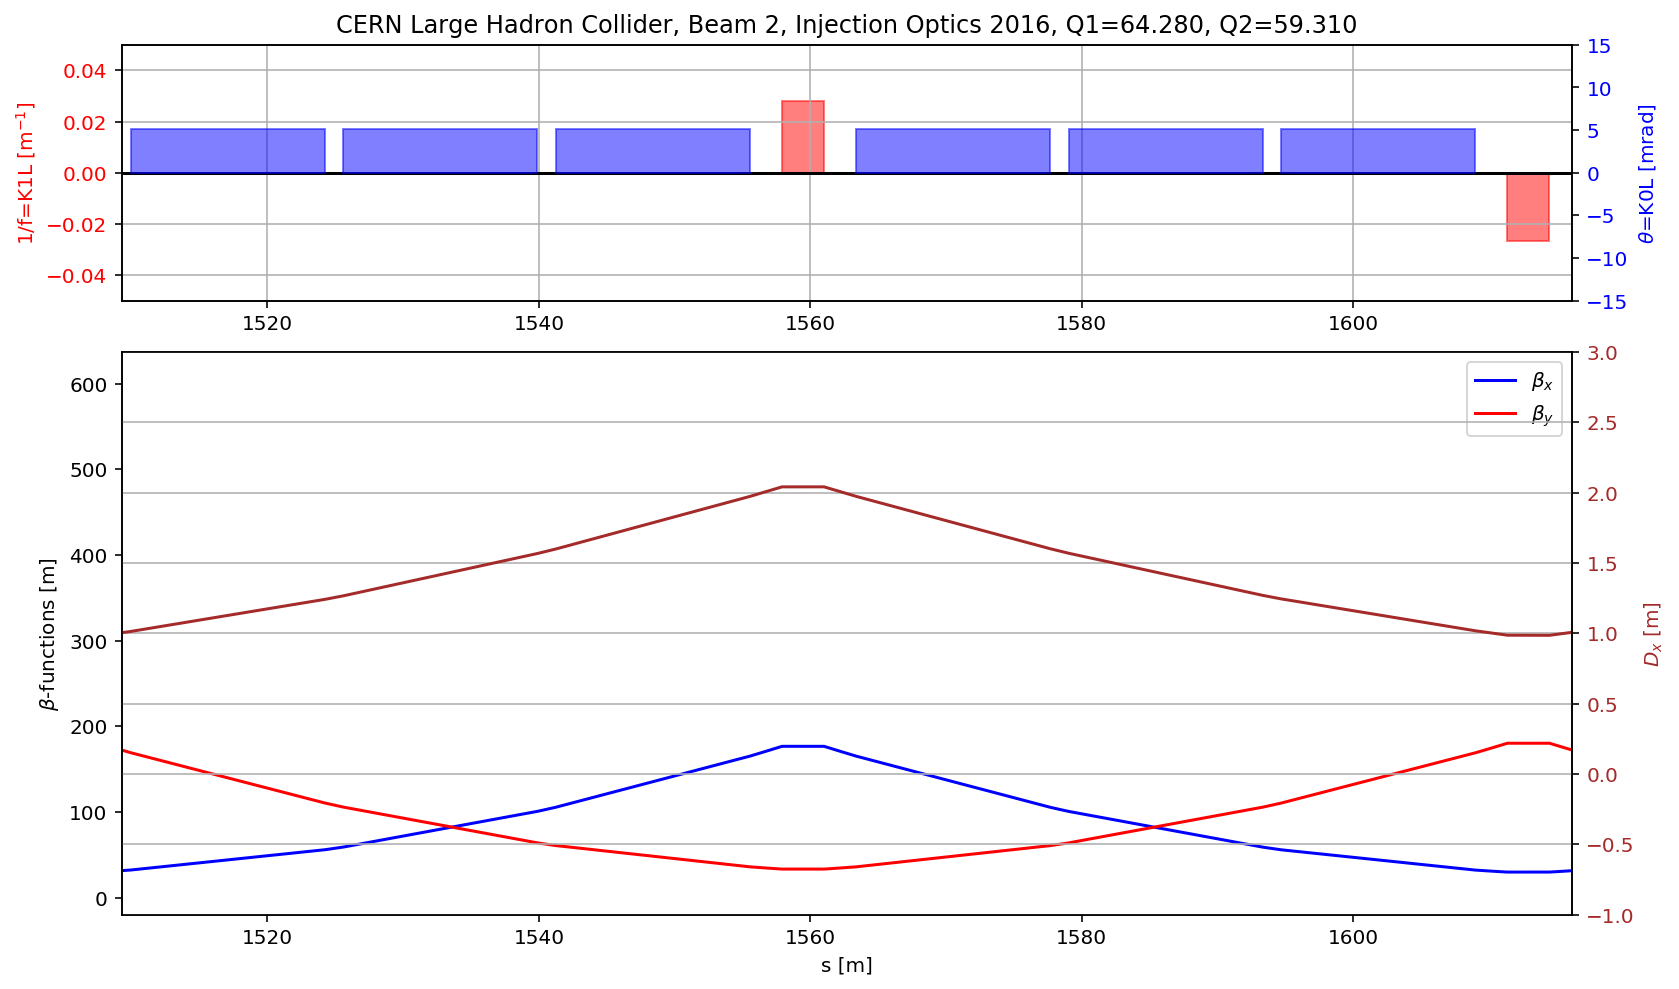

In [34]:
# the cell
aux=myTwiss[myTwiss['keyword']=='marker']
fig.gca().set_xlim(aux[(aux['name']).str.contains('s.cell.12.b2')].s.values[0],aux[(aux['name']).str.contains('e.cell.12.b2')].s.values[0])
display(fig)

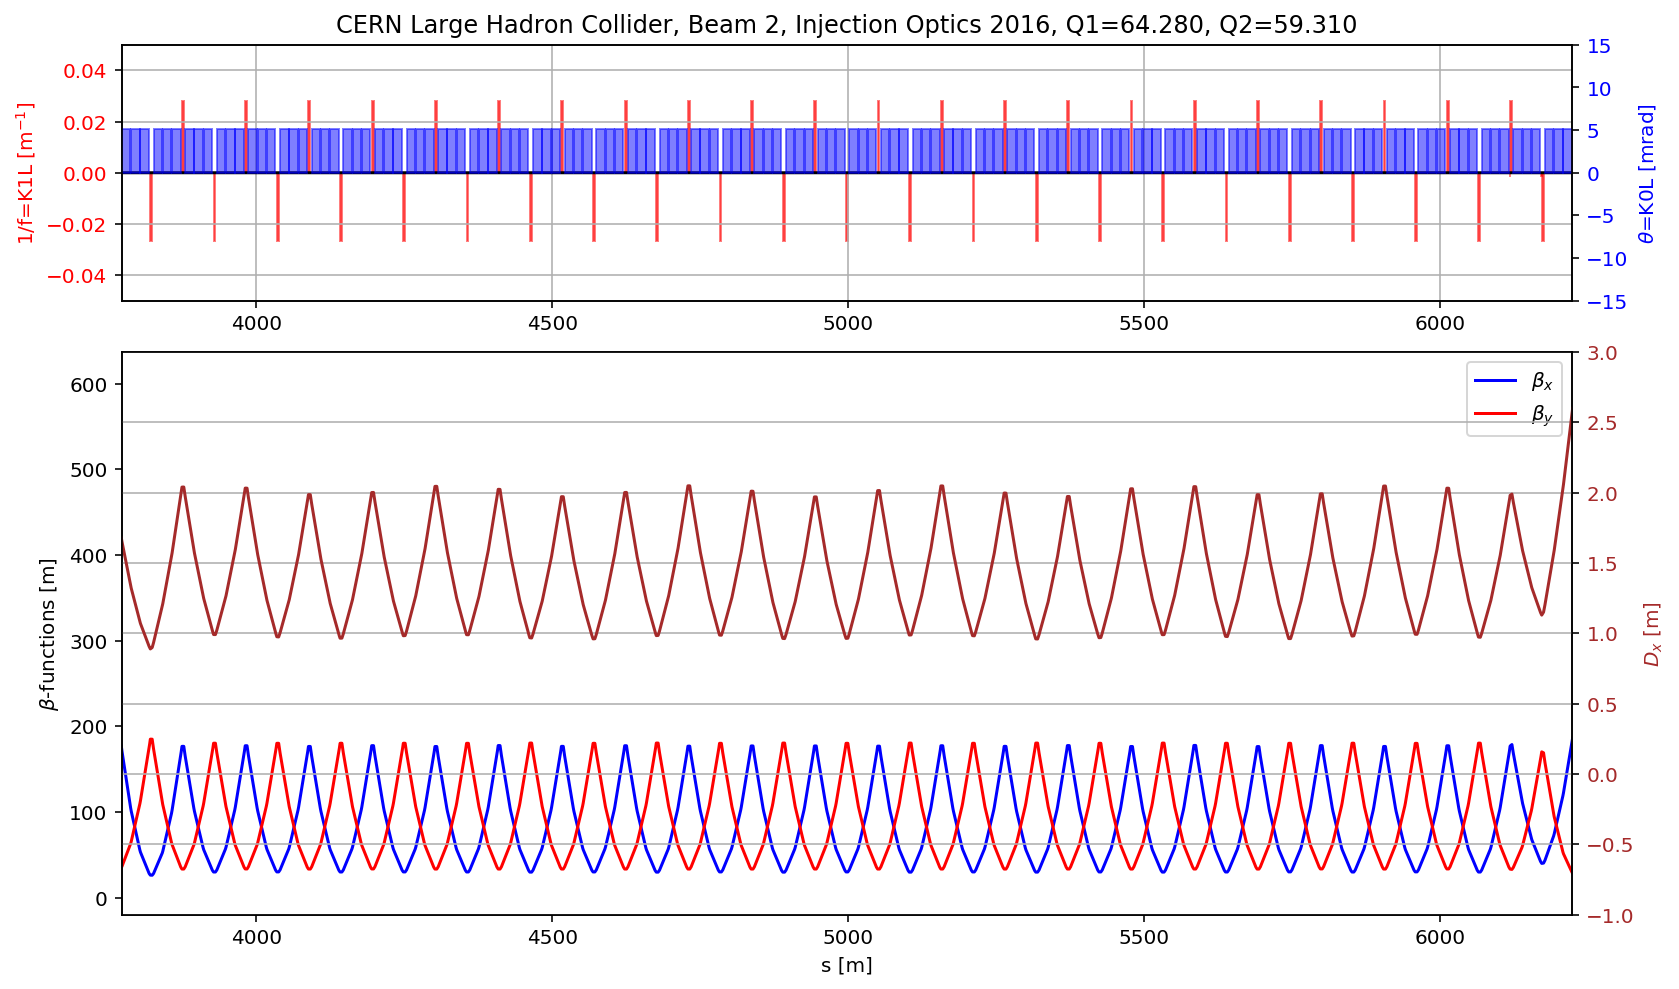

In [35]:
# the arc
aux=myTwiss[myTwiss['keyword']=='marker']
fig.gca().set_xlim(aux[(aux['name']).str.contains('s\.arc.23')].s.values[0],aux[(aux['name']).str.contains('e\.arc.23')].s.values[0])
display(fig)

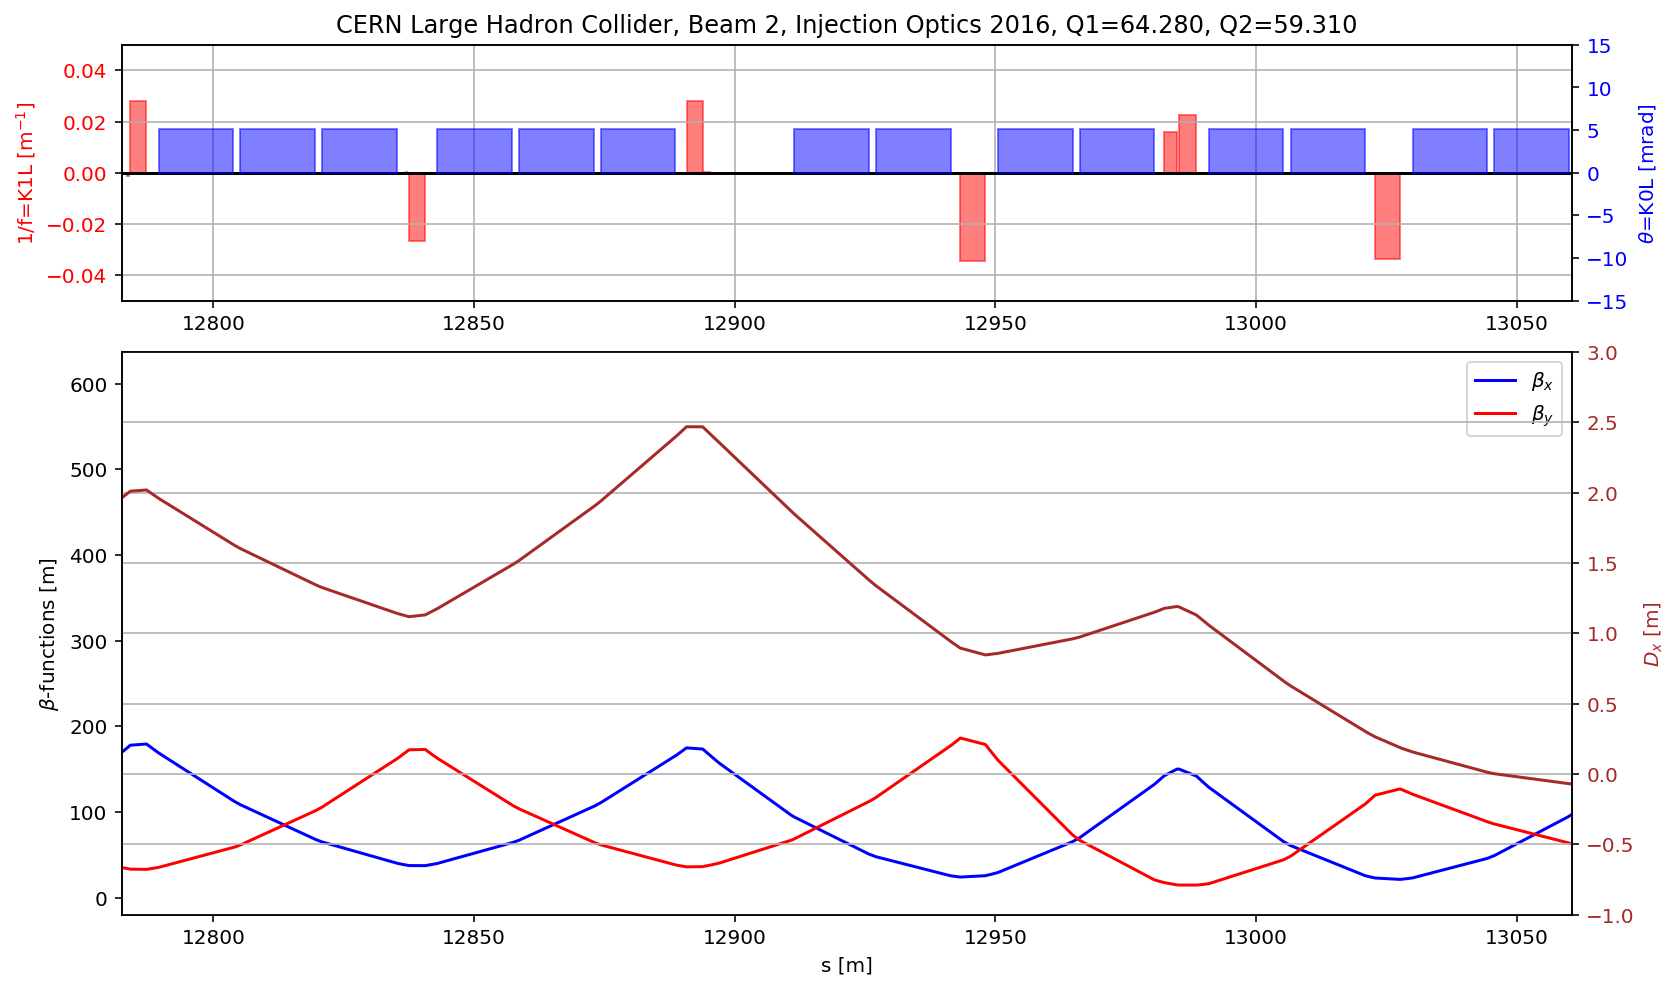

In [36]:
# the DS
aux=myTwiss[myTwiss['keyword']=='marker']
fig.gca().set_xlim(aux[(aux['name']).str.contains('s.ds.l5.b2:1')].s.values[0],aux[(aux['name']).str.contains('e.ds.l5.b2:1')].s.values[0])
display(fig)

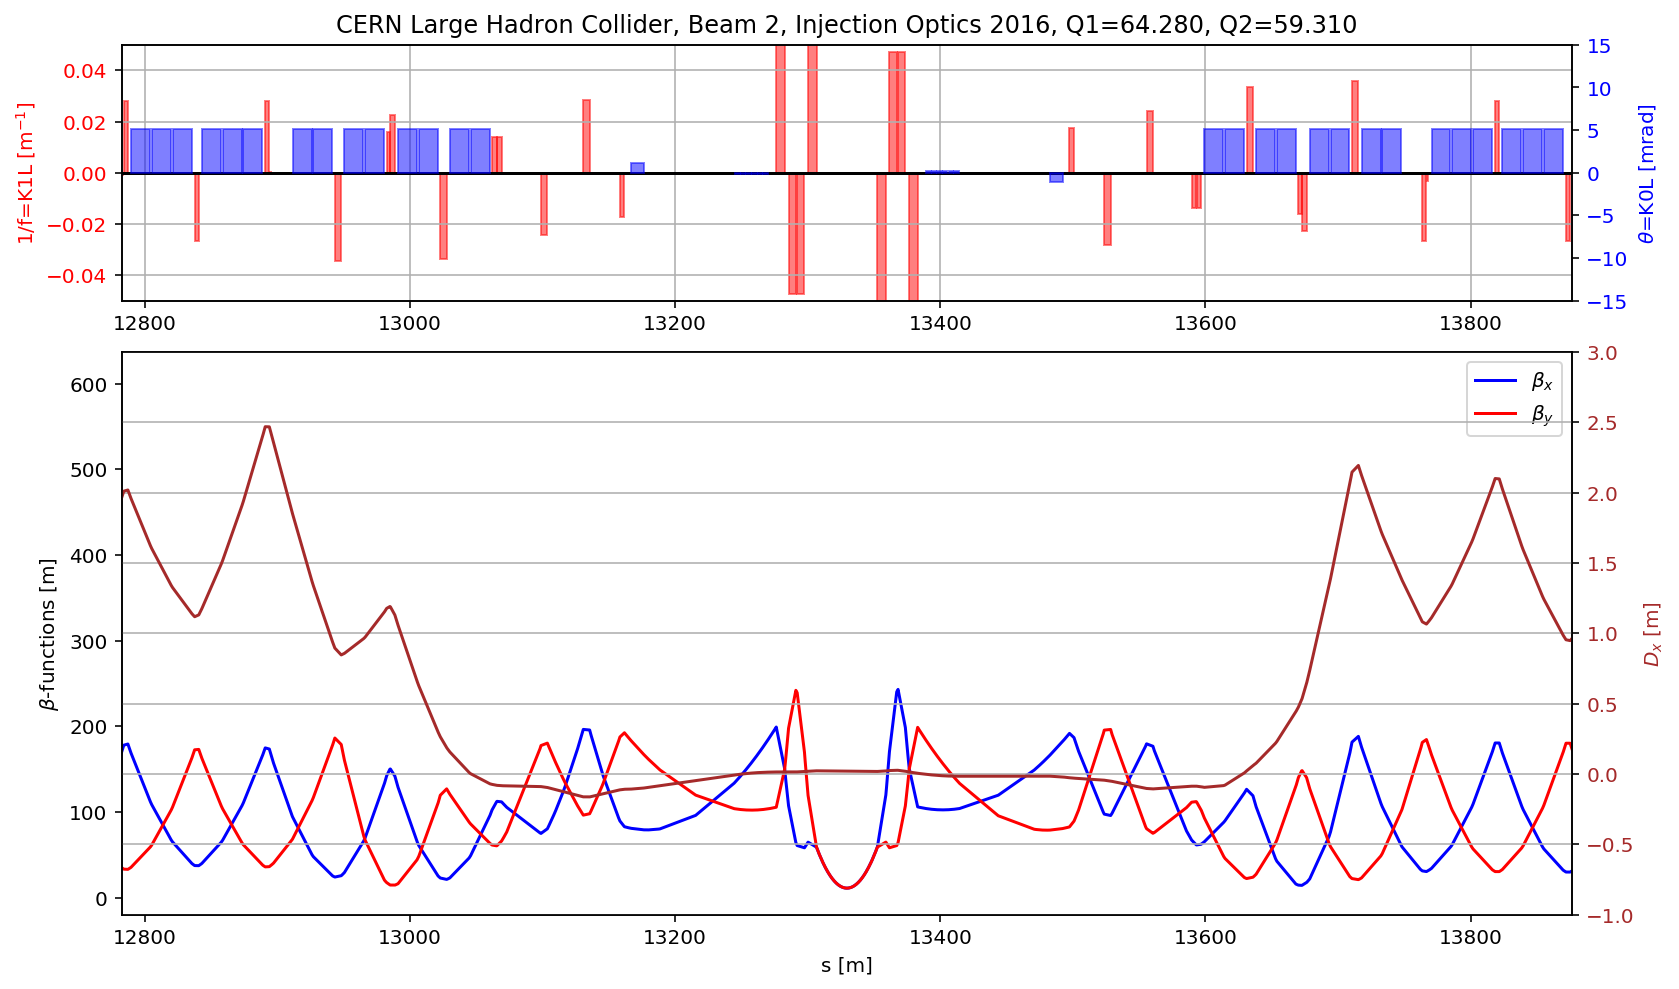

In [37]:
aux=myTwiss[myTwiss['keyword']=='marker']
fig.gca().set_xlim(aux[(aux['name']).str.contains('s.ds.l5.b2:1')].s.values[0],aux[(aux['name']).str.contains('e.ds.r5.b2:1')].s.values[0])
display(fig)

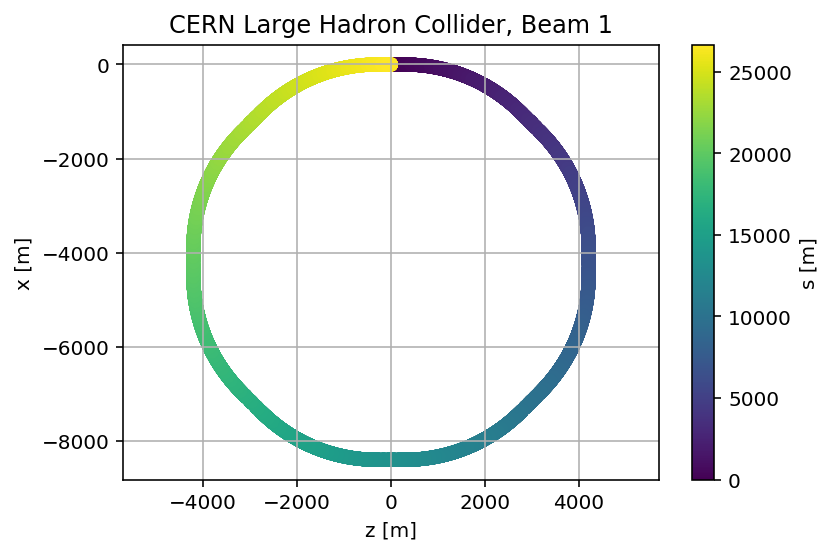

In [38]:
madx.input('survey, sequence=lhcb1;')
mySurvey=madx.table.survey.dframe()
plt.scatter(mySurvey['z'],mySurvey['x'],c=mySurvey['s'])
plt.axis('equal')
plt.xlabel('z [m]')
plt.ylabel('x [m]')
plt.grid()
cbar = plt.colorbar()
cbar.set_label('s [m]')
plt.title('CERN Large Hadron Collider, Beam 1');
plt.savefig('/cas/images/LHCB1Survey.pdf')


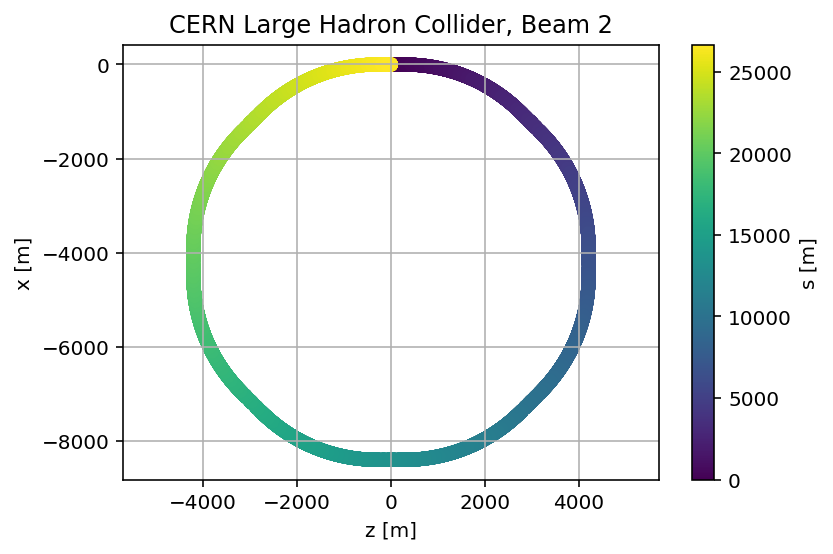

In [39]:
madx.input('survey, sequence=lhcb2;')
mySurvey=madx.table.survey.dframe()
plt.scatter(mySurvey['z'],mySurvey['x'],c=mySurvey['s'])
plt.axis('equal')
plt.xlabel('z [m]')
plt.ylabel('x [m]')
plt.grid()
cbar = plt.colorbar()
cbar.set_label('s [m]')
plt.title('CERN Large Hadron Collider, Beam 2');

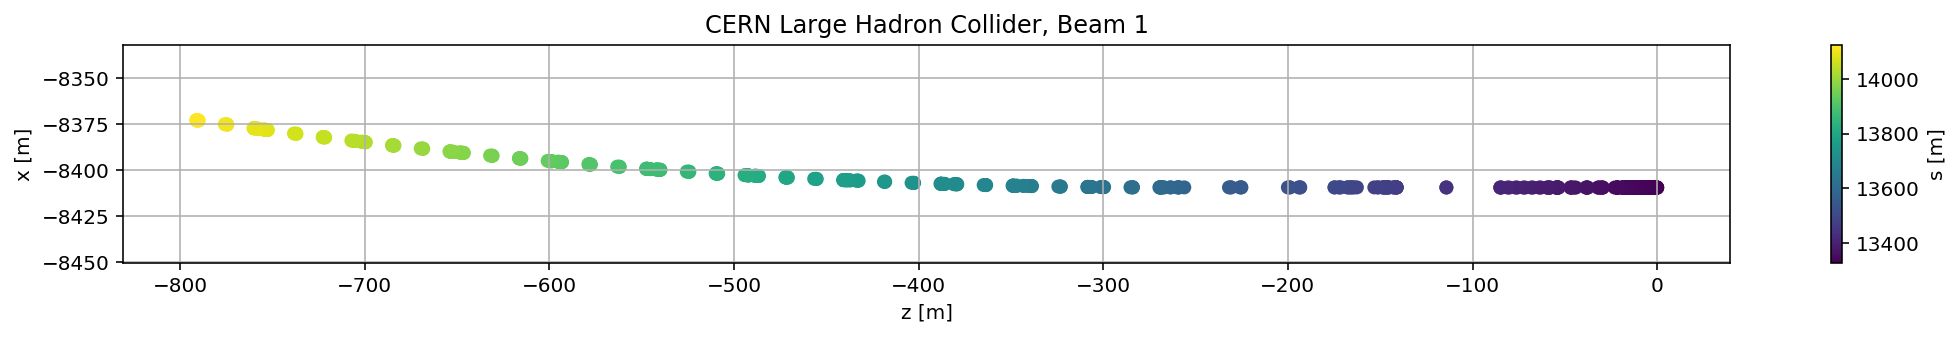

In [40]:
madx.input('survey, sequence=lhcb1;')
mySurvey=madx.table.survey.dframe()
plt.figure(figsize=(18,2))
mySurvey_filter=mySurvey[(mySurvey['s']>(13329.289233)) & (mySurvey['s']<(13329.289233+800))]

plt.scatter(mySurvey_filter['z'],mySurvey_filter['x'],c=mySurvey_filter['s'])
plt.xlabel('z [m]')
plt.ylabel('x [m]')
plt.grid()
plt.axis('equal')
cbar = plt.colorbar()
cbar.set_label('s [m]')
plt.title('CERN Large Hadron Collider, Beam 1');

## LEIR

In [124]:
# import elements, sequence and strengths
madx = Madx()
    
response = requests.get('http://project-leir-optics.web.cern.ch/project-LEIR-optics/2012/leir_2012.str')
data = response.text
madx.input(data);

response = requests.get('http://project-leir-optics.web.cern.ch/project-LEIR-optics/2012/leir_2012.ele')
data = response.text
madx.input(data);

response = requests.get('http://project-leir-optics.web.cern.ch/project-LEIR-optics/2012/leir_2012_new.seq')
data = response.text
madx.input(data);



  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.05.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2019.05.10               +
  + Execution date: 2019.06.06 16:09:13      +
  ++++++++++++++++++++++++++++++++++++++++++++
++++++ info: keddy redefined


In [125]:
madx.input(
'''
BEAM, PARTICLE=Pb54,
        MASS=0.931494*(207.947/208.),
        CHARGE=54./208.,
        ENERGY=0.931494*(207.947/208.) + .0042;

USE, PERIOD = LEIR;

TWISS;
''');

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
       78.54370266                 -0       0.1241078117        2.838575441 

                q1                dq1            betxmax              dxmax 
       1.820059569       -22.99549504         15.3369102        108.8390497 

             dxrms             xcomax             xcorms                 q2 
       55.68436877                  0                  0         2.71982919 

               dq2            betymax              dymax              dyrms 
      -50.08872216        20.07025727                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

            nflips 
          

In [126]:
myTwiss=madx.table.twiss.dframe()

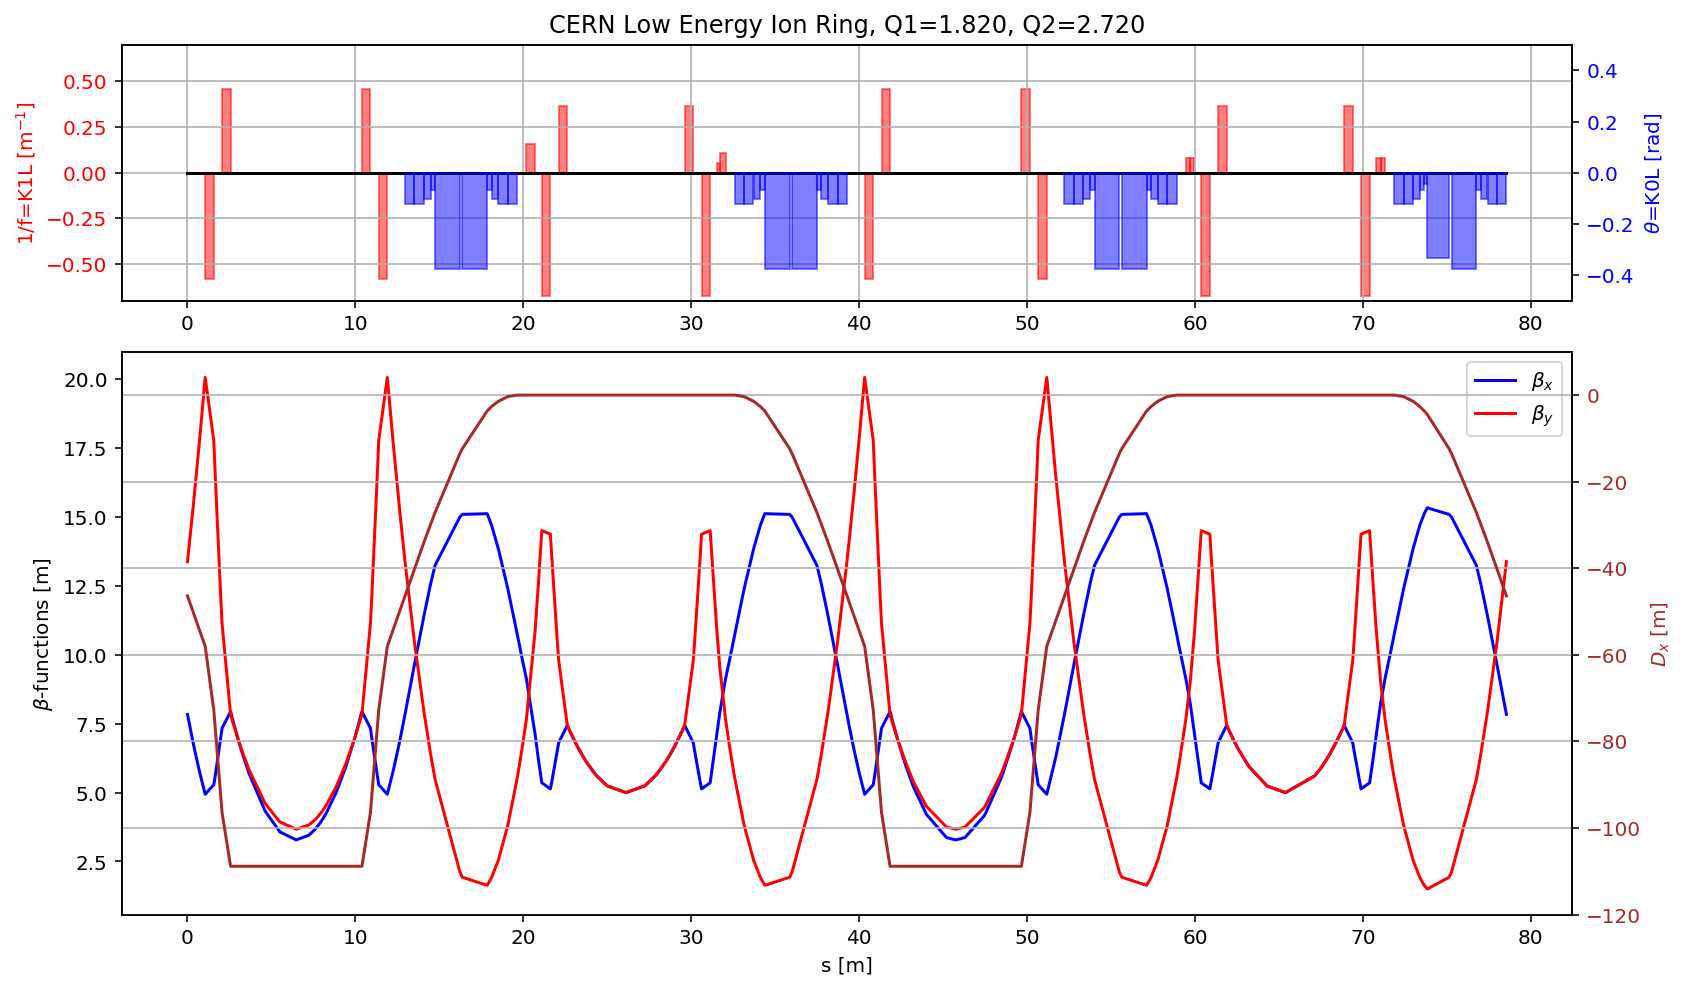

In [127]:
# plotting the results
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')

    
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.ylim(-.7,.7)
plt.title('CERN Low Energy Ion Ring, Q1='+format(madx.table.summ.Q1[0],'2.3f')+', Q2='+ format(madx.table.summ.Q2[0],'2.3f'))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


DF=myTwiss[(myTwiss['keyword']=='rbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle, v_offset=aux.angle/2, color='b')

DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle, v_offset=aux.angle/2, color='b')

    
plt.ylim(-.5,.5)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('$\\beta$-functions [m]')
plt.xlabel('s [m]')

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$')
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-120, 10)

plt.grid()
fig.savefig('/cas/images/LEIROpticsRing.pdf')

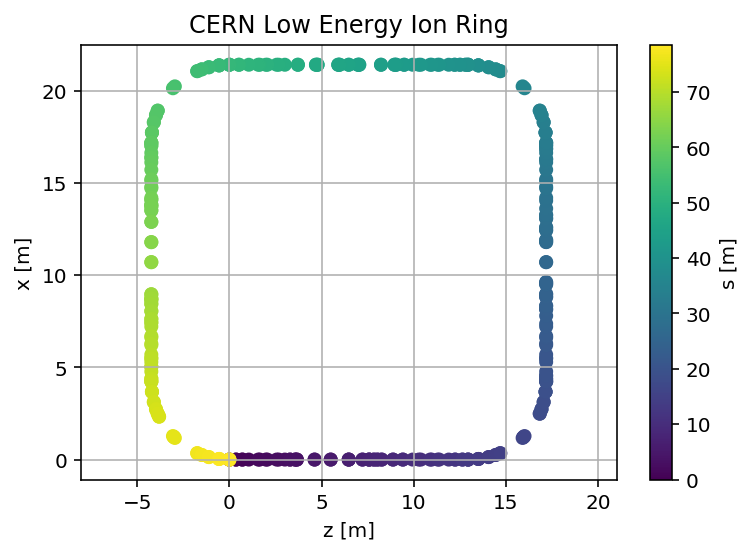

In [128]:
madx.input('survey;')
mySurvey=madx.table.survey.dframe()
plt.scatter(mySurvey['z'],mySurvey['x'],c=mySurvey['s'])
plt.axis('equal')
plt.xlabel('z [m]')
plt.ylabel('x [m]')
plt.grid()
cbar = plt.colorbar()
cbar.set_label('s [m]')
plt.title('CERN Low Energy Ion Ring');
plt.savefig('/cas/images/LEIRSurvey.pdf')

## AD

In [129]:
# import elements, sequence and strengths
madx = Madx()
    
response = requests.get('http://project-ad-optics.web.cern.ch/project-AD-optics/2016/strength/ad_quads_3837_ffe.str')
data = response.text
madx.input(data);

response = requests.get('http://project-ad-optics.web.cern.ch/project-AD-optics/2016/elements/ad.ele')
data = response.text
madx.input(data);

response = requests.get('http://project-ad-optics.web.cern.ch/project-AD-optics/2016/sequence/ad.seq')
data = response.text
madx.input(data);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.05.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2019.05.10               +
  + Execution date: 2019.06.06 16:09:36      +
  ++++++++++++++++++++++++++++++++++++++++++++
++++++ info: fe redefined
++++++ info: element redefined: kfe.e
++++++ info: element redefined: kfe.d


In [130]:
madx.input(
'''
/*****************************************************************************
 * TITLE
 *****************************************************************************/
 title, 'AD HE optics. Anti-Protons - 3.57 GeV/c';

 option, echo;
 option, RBARC=FALSE;

 seqedit, sequence=ad;
  flatten;
  cycle, start=STARTAD;
 endedit;

/*******************************************************************************
 * Beam
 * NB! beam->ex == (beam->exn)/(beam->gamma*beam->beta*4)
 *******************************************************************************/
 Beam, particle=POSITRON, MASS=0.51099906E-3, ENERGY=1.0,PC=0.99999986944, GAMMA=1.956950762297E3;

/*******************************************************************************
 * Use
 *******************************************************************************/
 use, sequence=ad, range=#STARTAD/#e;



/*******************************************************************************
 * twiss
 *******************************************************************************/
 twiss;
''');

++++++ info: seqedit - number of elements installed:  0
++++++ info: seqedit - number of elements moved:      0
++++++ info: seqedit - number of elements removed:    0
++++++ info: seqedit - number of elements replaced:   0
++++++ warning: Both energy and pc specified; pc was ignored.
++++++ warning: Both energy and gamma specified; gamma was ignored.
enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
          182.4328                 -0      0.04351104296        4.794024545 

                q1                dq1            betxmax              dxmax 
       5.384980535       0.2577144415        16.45917897        3.813103438 

             dxrms             xcomax             xcorms                 q2 
       1.757088568                  0                  0        5.369205521 

               dq2            betymax              dymax              dyrms 
      0.2886376856        20.89642044                 -0        

In [131]:
myTwiss=madx.table.twiss.dframe()

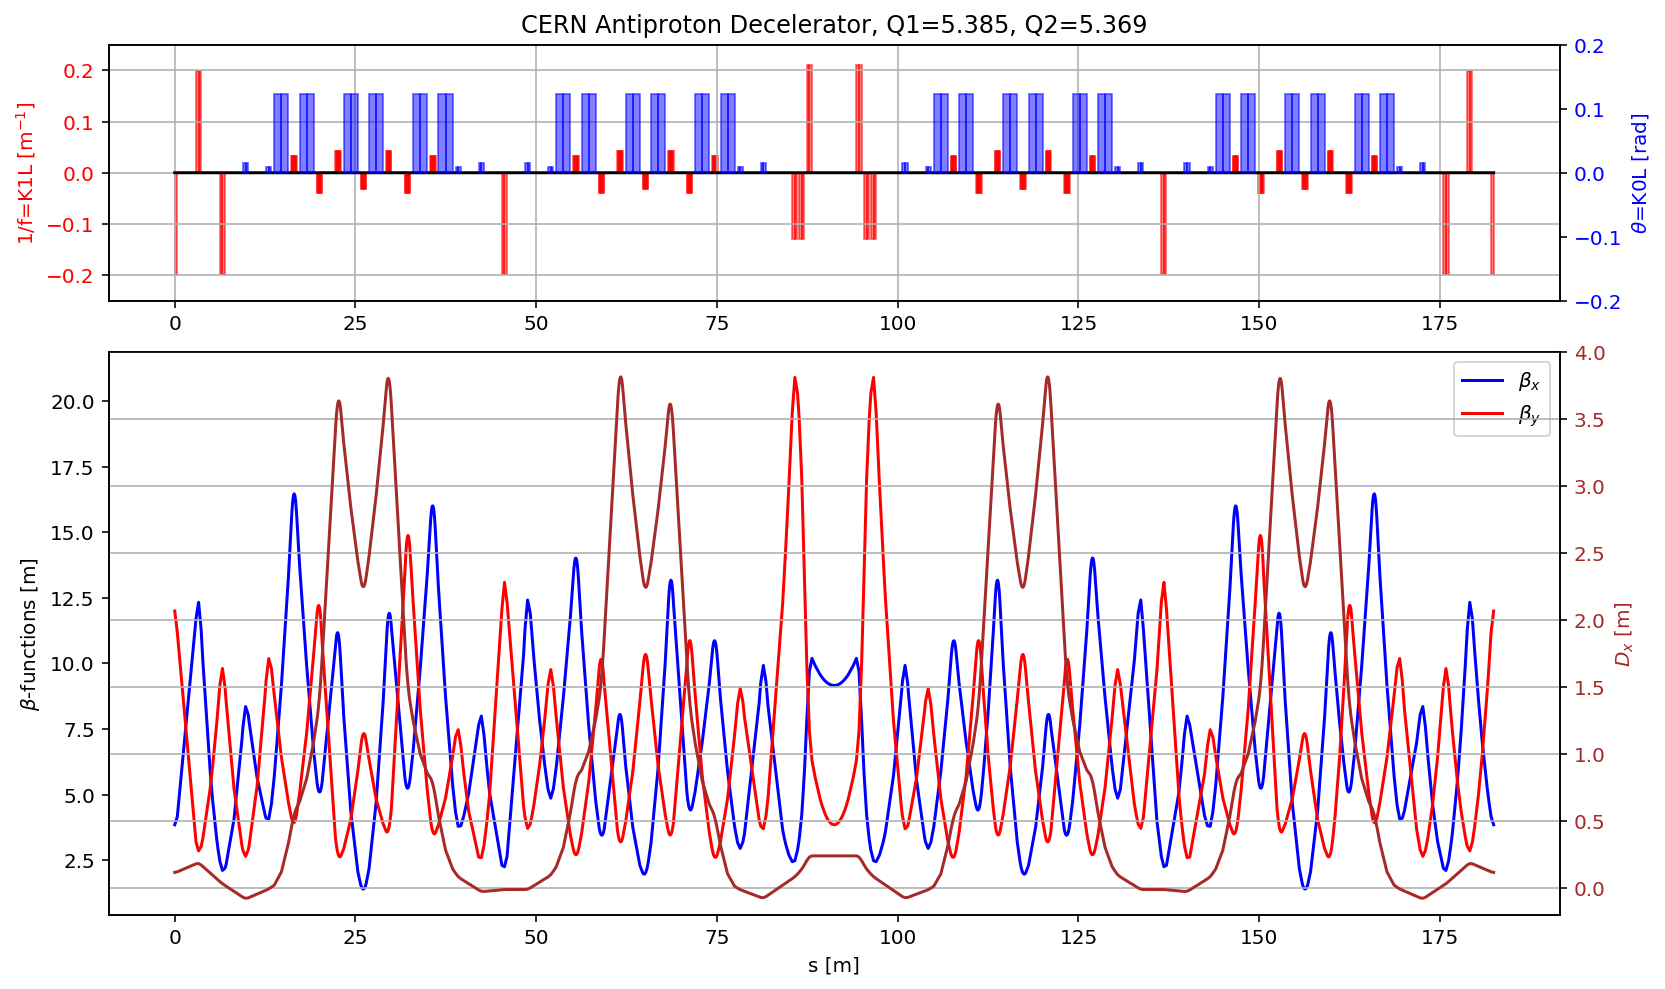

In [132]:
# plotting the results
fig = plt.figure(figsize=(13,8))
# set up subplot grid
#gridspec.GridSpec(3,3)

ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(myTwiss['s'],0*myTwiss['s'],'k')

    
DF=myTwiss[(myTwiss['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

    
color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.ylim(-.25,.25)
plt.title('CERN Antiproton Decelerator, Q1='+format(madx.table.summ.Q1[0],'2.3f')+', Q2='+ format(madx.table.summ.Q2[0],'2.3f'))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)


DF=myTwiss[(myTwiss['keyword']=='rbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle, v_offset=aux.angle/2, color='b')

DF=myTwiss[(myTwiss['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(ax2,aux, height=aux.angle, v_offset=aux.angle/2, color='b')

    
plt.ylim(-.2,.2)

# large subplot
plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(myTwiss['s'],myTwiss['betx'],'b', label='$\\beta_x$')
plt.plot(myTwiss['s'],myTwiss['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('$\\beta$-functions [m]')
plt.xlabel('s [m]')

ax3 = plt.gca().twinx()   # instantiate a second axes that shares the same x-axis
plt.plot(myTwiss['s'],myTwiss['dx'],'brown', label='$D_x$')
ax3.set_ylabel('$D_x$ [m]', color='brown')  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(-.2, 4)

plt.grid()
fig.savefig('/cas/images/ADOpticsRing.pdf')

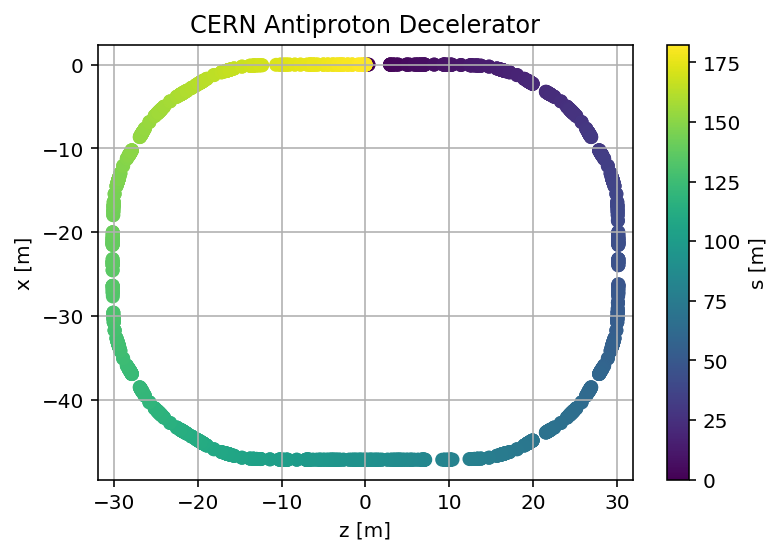

In [134]:
madx.input('survey;')
mySurvey=madx.table.survey.dframe()
plt.scatter(mySurvey['z'],mySurvey['x'],c=mySurvey['s'])
plt.axis('equal')
plt.xlabel('z [m]')
plt.ylabel('x [m]')
plt.grid()
cbar = plt.colorbar()
cbar.set_label('s [m]')
plt.title('CERN Antiproton Decelerator');
plt.savefig('/cas/images/ADSurvey.pdf')